In [5]:
!pip install pymc arviz


# All IMPORTS

In [ ]:
import pandas as pd
import numpy as np
from numpy import radians, sin, cos, sqrt, arctan2
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
from geopy.distance import geodesic
from datetime import datetime
import lightgbm as lgb
import xgboost as xgb
import pymc as pm
import arviz as az
from lightgbm import LGBMRegressor

In [ ]:
from scipy.spatial.distance import cosine
from scipy.stats import skew, kurtosis, entropy
from scipy.signal import welch

In [6]:
from sklearn.neighbors import BallTree
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.decomposition import PCA
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

#DATA COLLECTION AND MERGING THE REQUIRED COLUMNS TOGETHER

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
smrec_sample_path = "/content/drive/MyDrive/MUSHI_MUSHI/smrec_schema.tsv"

In [9]:
df_preview = pd.read_csv(smrec_sample_path, sep="\t", nrows=5)
df_preview.columns.tolist()


['smrec_id',
 'filebasename',
 'site_id',
 'eq_source_id',
 'length',
 'samplefreq',
 'maxacc0',
 'maxacc1',
 'maxacc2',
 'maxaccrd050',
 'maxaccrd100',
 'maxvel0',
 'maxvel1',
 'maxvel2',
 'maxvel0_filchb1',
 'maxvel1_filchb1',
 'maxvel2_filchb1',
 'maxvelrd050',
 'maxvelrd100',
 'maxvelrd050_filchb1',
 'maxvelrd100_filchb1',
 'maxaccv',
 'maxvelv',
 'maxvelv_filchb1',
 'sival',
 'sindo',
 'rsaccc2d005t0002',
 'rsaccc2d005t0003',
 'rsaccc2d005t0004',
 'rsaccc2d005t0005',
 'rsaccc2d005t0006',
 'rsaccc2d005t0007',
 'rsaccc2d005t0008',
 'rsaccc2d005t0009',
 'rsaccc2d005t0010',
 'rsaccc2d005t0011',
 'rsaccc2d005t0012',
 'rsaccc2d005t0013',
 'rsaccc2d005t0015',
 'rsaccc2d005t0020',
 'rsaccc2d005t0022',
 'rsaccc2d005t0025',
 'rsaccc2d005t0030',
 'rsaccc2d005t0035',
 'rsaccc2d005t0040',
 'rsaccc2d005t0045',
 'rsaccc2d005t0050',
 'rsaccc2d005t0060',
 'rsaccc2d005t0070',
 'rsaccc2d005t0080',
 'rsaccc2d005t0090',
 'rsaccc2d005t0100',
 'rsaccc2d005t0110',
 'rsaccc2d005t0120',
 'rsaccc2d005t0130'

In [10]:
df_preview.head(50)

,smrec_id,filebasename,site_id,eq_source_id,length,samplefreq,maxacc0,maxacc1,maxacc2,maxaccrd050,...,rsaccrd100d005t1800,rsaccrd050d005t1900,rsaccrd100d005t1900,rsaccrd050d005t2000,rsaccrd100d005t2000,maxsvad005,fault_dist,lower_period,upper_period,multiple
0,438556,HYG0129605111446,11044111,326,5900,100.0,1.967047,2.299199,0.887957,2.235448,...,0.012727,0.010220,0.012807,0.009800,0.012710,0.071255,64.3073,-1.0,-1.0,0
1,439358,HYG0179605111446,11044611,326,5900,100.0,3.546047,2.134215,1.829855,2.800226,...,0.008262,0.006760,0.008030,0.006384,0.007811,0.053050,53.4245,-1.0,-1.0,0
2,439523,HYG0189605111446,11044711,326,5900,100.0,3.075203,4.837508,2.382305,3.745904,...,0.008215,0.006967,0.008346,0.007007,0.007955,0.074476,41.2972,-1.0,-1.0,0
3,439618,HYG0199605111446,11044811,326,5900,100.0,8.398145,17.563337,8.687790,12.435615,...,0.010459,0.008942,0.009903,0.008737,0.009448,0.056220,37.0693,-1.0,-1.0,0
4,439759,HYG0209605111446,11044911,326,5900,100.0,3.160036,1.405564,1.254392,2.444314,...,0.010329,0.007769,0.010042,0.007163,0.009041,0.053564,31.5495,-1.0,-1.0,0


In [11]:
smrec_path = "/content/drive/MyDrive/MUSHI_MUSHI/smrec_schema.tsv"
site_path = "/content/drive/MyDrive/MUSHI_MUSHI/site_schema.tsv"
source_path = "/content/drive/MyDrive/MUSHI_MUSHI/source_schema.tsv"

smrec_df = pd.read_csv(smrec_path, sep="\t", nrows=10000)
site_df = pd.read_csv(site_path, sep="\t", nrows=10000)
source_df = pd.read_csv(source_path, sep="\t", nrows=10000)

In [13]:
site_df.head(20)

,siteid2,start_date,end_date,site_code,site_name,lon,lat,elevation,sensor_depth_glminus,obs_network_id,...,vs20,vs30,meshcode250,avs30,meshcode3,d1100,d1400,d1700,d2100,dbase
0,1100011,1996/01/01,9999/12/31,AIC001,尾西,136.7505,35.2974,5,-1,1,...,145.8,NaN,5236765031,196.4,52367650,555.6,671.4,671.4,671.4,671.4
1,1100021,1996/01/01,9999/12/31,AIC002,小牧,136.9154,35.2979,21,1,1,...,NaN,NaN,5236775331,376.3,52367753,154.9,154.9,154.9,154.9,154.9
2,1100031,1996/01/01,9999/12/31,AIC003,津島,136.7402,35.1734,-1,1,1,...,130.0,NaN,5236650933,142.7,52366509,1192.1,1277.0,1277.0,1277.0,1277.0
3,1100041,1996/01/01,2004/10/27,AIC004,名古屋,136.9736,35.0634,30,0,1,...,274.0,NaN,5236477742,324.3,52364777,646.1,941.4,941.4,941.4,941.4
4,1100042,2004/10/28,9999/12/31,AIC004,名古屋,136.9738,35.0631,30,2,1,...,278.4,NaN,5236477742,324.3,52364777,646.1,941.4,941.4,941.4,941.4
5,1100051,1996/01/01,9999/12/31,AIC005,藤岡,137.2061,35.1983,134,-16,1,...,NaN,NaN,5237613634,378.9,52376136,43.1,47.4,49.5,54.2,79.2
6,1100061,1996/01/01,9999/12/31,AIC006,稲武,137.5089,35.2158,505,-5,1,...,NaN,NaN,5237645043,339.2,52376450,5.0,10.0,20.0,30.0,151.2
7,1100071,1996/01/01,2003/01/30,AIC007,足助,137.3353,35.1394,158,0,1,...,NaN,NaN,5237526642,360.0,52375266,4.0,10.0,20.0,30.0,151.0
8,1100081,1996/01/01,2011/08/04,AIC008,設楽,137.5697,35.0977,465,0,1,...,NaN,NaN,5237541541,360.0,52375415,20.2,32.0,32.0,58.4,58.4
9,1100082,2011/08/05,9999/12/31,AIC008,設楽,137.5757,35.1006,479,0,1,...,NaN,NaN,5237542611,342.9,52375426,20.1,37.4,37.4,49.8,49.8


In [14]:
source_df.head(20)

,eq_source_id,segment_idx,jem_origin_time,jem_lat,jem_lon,jem_depth,mjma,eq_location_type_id,nf_origin_time,nf_lat,...,exp,eq_event_name,width,length,top_center_lat,top_center_lon,strike_deg,dip_deg,h_top,eq_location_type_id_source
0,1,0,1996-01-01 21:45:34.4,28.298,130.002,24.66,3.0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,0,1996-01-02 11:22:14.47,25.601,124.755,6.00,5.1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,0,1996-01-02 19:55:13.29,42.437,142.188,92.70,4.8,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,0,1996-01-03 22:02:35.07,24.775,124.278,65.00,4.3,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,0,1996-01-04 12:52:02.12,34.135,136.060,47.74,4.4,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,6,0,1996-01-04 21:14:16.16,42.967,145.430,45.39,3.7,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,7,0,1996-01-05 05:12:58.04,42.017,142.500,60.91,4.4,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,8,0,1996-01-05 15:49:05.28,24.503,124.181,50.20,3.6,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,9,0,1996-01-06 02:23:52.52,41.359,140.032,10.66,3.4,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,10,0,1996-01-06 16:39:23.18,33.607,135.676,39.28,3.8,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [15]:
print(smrec_df.columns.tolist())


['smrec_id', 'filebasename', 'site_id', 'eq_source_id', 'length', 'samplefreq', 'maxacc0', 'maxacc1', 'maxacc2', 'maxaccrd050', 'maxaccrd100', 'maxvel0', 'maxvel1', 'maxvel2', 'maxvel0_filchb1', 'maxvel1_filchb1', 'maxvel2_filchb1', 'maxvelrd050', 'maxvelrd100', 'maxvelrd050_filchb1', 'maxvelrd100_filchb1', 'maxaccv', 'maxvelv', 'maxvelv_filchb1', 'sival', 'sindo', 'rsaccc2d005t0002', 'rsaccc2d005t0003', 'rsaccc2d005t0004', 'rsaccc2d005t0005', 'rsaccc2d005t0006', 'rsaccc2d005t0007', 'rsaccc2d005t0008', 'rsaccc2d005t0009', 'rsaccc2d005t0010', 'rsaccc2d005t0011', 'rsaccc2d005t0012', 'rsaccc2d005t0013', 'rsaccc2d005t0015', 'rsaccc2d005t0020', 'rsaccc2d005t0022', 'rsaccc2d005t0025', 'rsaccc2d005t0030', 'rsaccc2d005t0035', 'rsaccc2d005t0040', 'rsaccc2d005t0045', 'rsaccc2d005t0050', 'rsaccc2d005t0060', 'rsaccc2d005t0070', 'rsaccc2d005t0080', 'rsaccc2d005t0090', 'rsaccc2d005t0100', 'rsaccc2d005t0110', 'rsaccc2d005t0120', 'rsaccc2d005t0130', 'rsaccc2d005t0150', 'rsaccc2d005t0170', 'rsaccc2d005

In [16]:
print(site_df.columns.tolist())


['siteid2', 'start_date', 'end_date', 'site_code', 'site_name', 'lon', 'lat', 'elevation', 'sensor_depth_glminus', 'obs_network_id', 'installation_situation_id', 'dist_vf_mf13_nejapan', 'dist_vf_mf13_swjapan', 'vs10', 'vs20', 'vs30', 'meshcode250', 'avs30', 'meshcode3', 'd1100', 'd1400', 'd1700', 'd2100', 'dbase']


In [17]:
# Previewing the filebasename and site_code formats in order to check how can we concat the two files
print("Sample smrec_df['filebasename']:", smrec_df['filebasename'].dropna().unique()[:5])
print("Sample site_df['site_code']:", site_df['site_code'].dropna().unique()[:5])


Sample smrec_df['filebasename']: ['HYG0129605111446' 'HYG0179605111446' 'HYG0189605111446'
 'HYG0199605111446' 'HYG0209605111446']
Sample site_df['site_code']: ['AIC001' 'AIC002' 'AIC003' 'AIC004' 'AIC005']


In [18]:
# Extracting first 6 digits from 'filebasename' to get site_code for matching
smrec_df['site_code_extracted'] = smrec_df['filebasename'].astype(str).str[:6]

site_df['site_code'] = site_df['site_code'].astype(str)

# Merging smrec_df with site_df using extracted site_code
smrec_enriched = pd.merge(
    smrec_df,
    site_df,
    left_on='site_code_extracted',
    right_on='site_code',
    how='left'
)

missing_coords = smrec_enriched[['lat', 'lon']].isna().sum()
print("Missing coordinates:\n", missing_coords)

source_df['eq_source_id'] = source_df['eq_source_id'].astype(smrec_enriched['eq_source_id'].dtype)
smrec_enriched = pd.merge(
    smrec_enriched,
    source_df,
    on='eq_source_id',
    how='left'
)


Missing coordinates:
 lat    0
lon    0
dtype: int64
Final merged shape: (11820, 267)
Sample columns in merged dataframe:
 Index(['smrec_id', 'filebasename', 'site_id', 'eq_source_id', 'length_x',
       'samplefreq', 'maxacc0', 'maxacc1', 'maxacc2', 'maxaccrd050'],
      dtype='object')


In [ ]:
print("Final merged shape:", smrec_enriched.shape)
print("Sample columns in merged dataframe:\n", smrec_enriched.columns[:10])

#DATA Cleaning and Preprocessing (with imputations)


In [ ]:
print("Shape:", smrec_enriched.shape)
smrec_enriched.info()

In [22]:
null_counts = smrec_enriched.isnull().sum().sort_values(ascending=False)
print("\nTop columns with missing values:\n", null_counts.head(30))

Shape: (11820, 267)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11820 entries, 0 to 11819
Columns: 267 entries, smrec_id to eq_location_type_id_source
dtypes: float64(243), int64(15), object(9)
memory usage: 24.1+ MB

Top columns with missing values:
 vs30                    11784
dip_deg                 11102
strike_deg              11102
top_center_lon          11102
top_center_lat          11102
length_y                11102
width                   11102
eq_event_name           11102
h_top                   11102
mw                       6605
strike1                  6605
dip1                     6605
rake1                    6605
eq_mechanism_type_id     6605
cmt_depth                6605
nf_depth                 6605
nf_lat                   6605
nf_lon                   6605
nf_origin_time           6605
varred                   6605
exp                      6605
mzz                      6605
myz                      6605
myy                      6605
mxz                   

In [23]:
id_cols = ['smrec_id', 'filebasename', 'site_code_extracted', 'site_code', 'siteid2', 'site_name']

target_cols = ['maxaccv', 'maxvelv']  # Our proxies for PGA and PGV

# Site location & metadata (from site_schema)
site_cols = ['lat', 'lon', 'elevation', 'vs10', 'vs20', 'vs30', 'avs30', 'sensor_depth_glminus']

# Earthquake source columns (from source_schema)
source_cols = ['strike_deg', 'dip_deg', 'h_top', 'length_x', 'length_y', 'top_center_lat', 'top_center_lon']

# Time-domain or waveform summary stats
waveform_cols = [col for col in smrec_enriched.columns if 'rsacc' in col or 'rsvel' in col or 'sival' in col or 'sindo' in col]

print(f"\nID Columns: {id_cols}")
print(f"Target Columns: {target_cols}")
print(f"Site Columns: {site_cols}")
print(f"Source Columns: {source_cols}")
print(f"Waveform/Seismic Feature Columns (count: {len(waveform_cols)})")



ID Columns: ['smrec_id', 'filebasename', 'site_code_extracted', 'site_code', 'siteid2', 'site_name']
Target Columns: ['maxaccv', 'maxvelv']
Site Columns: ['lat', 'lon', 'elevation', 'vs10', 'vs20', 'vs30', 'avs30', 'sensor_depth_glminus']
Source Columns: ['strike_deg', 'dip_deg', 'h_top', 'length_x', 'length_y', 'top_center_lat', 'top_center_lon']
Waveform/Seismic Feature Columns (count: 179)


In [24]:
redundant_id_cols = ['filebasename', 'site_code_extracted', 'site_code', 'siteid2', 'site_name']
existing_cols_to_drop = [col for col in redundant_id_cols if col in smrec_enriched.columns]

smrec_cleaned = smrec_enriched.drop(columns=existing_cols_to_drop)


In [25]:
# Drop columns with more than 90% missing
high_missing_cols = smrec_cleaned.columns[smrec_cleaned.isnull().mean() > 0.90]
print("Columns with > 90% missing values:", list(high_missing_cols))

smrec_cleaned = smrec_cleaned.drop(columns=high_missing_cols)


Columns with > 90% missing values: ['vs30', 'eq_event_name', 'width', 'length_y', 'top_center_lat', 'top_center_lon', 'strike_deg', 'dip_deg', 'h_top']


In [26]:
# Count missing values
missing_counts = smrec_cleaned.isna().sum()
missing_percent = (missing_counts / len(smrec_cleaned)) * 100

# Combine into DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

print("Top 30 columns with missing values:")
print(missing_summary.head(30))

Top 30 columns with missing values:
                      Missing Count  Missing %
dip1                           6605  55.879865
rake1                          6605  55.879865
eq_mechanism_type_id           6605  55.879865
cmt_depth                      6605  55.879865
varred                         6605  55.879865
mxx                            6605  55.879865
mxy                            6605  55.879865
mxz                            6605  55.879865
myy                            6605  55.879865
myz                            6605  55.879865
nf_lat                         6605  55.879865
nf_depth                       6605  55.879865
mw                             6605  55.879865
nf_origin_time                 6605  55.879865
nf_lon                         6605  55.879865
strike1                        6605  55.879865
exp                            6605  55.879865
mzz                            6605  55.879865
vs20                           5147  43.544839
vs10                    

In [27]:
# Define column groups
id_columns = ['smrec_id', 'filebasename', 'site_id_x', 'site_name', 'site_code_extracted']
target_columns = ['maxaccv', 'maxvelv']

site_metadata_columns = [
    'lat', 'lon', 'elevation', 'vs10', 'vs20', 'vs30', 'avs30', 'sensor_depth_glminus'
]

source_columns = [
    'strike_deg', 'dip_deg', 'h_top', 'length_x', 'length_y', 'top_center_lat',
    'top_center_lon', 'eq_event_name', 'width', 'exp', 'eq_location_type_id_source',
    'nf_lat', 'nf_lon', 'nf_depth', 'nf_origin_time', 'strike1', 'dip1', 'rake1',
    'eq_mechanism_type_id', 'varred', 'mw', 'mxx', 'mxy', 'mxz', 'myy', 'myz', 'mzz',
    'cmt_depth'
]

# Capture all seismic features programmatically
all_cols = set(smrec_cleaned.columns)
used_cols = set(id_columns + target_columns + site_metadata_columns + source_columns)
waveform_columns = sorted(list(all_cols - used_cols))


In [28]:
# Check which columns have > 50% missing values
missing_threshold = 0.5
missing_percent = smrec_cleaned.isna().mean()
high_missing_cols = missing_percent[missing_percent > missing_threshold].sort_values(ascending=False)

print("Columns with >50% missing values:")
print(high_missing_cols)


Columns with >50% missing values:
nf_origin_time          0.558799
nf_lat                  0.558799
nf_lon                  0.558799
nf_depth                0.558799
mw                      0.558799
strike1                 0.558799
dip1                    0.558799
rake1                   0.558799
eq_mechanism_type_id    0.558799
cmt_depth               0.558799
varred                  0.558799
mxx                     0.558799
mxy                     0.558799
mxz                     0.558799
myy                     0.558799
myz                     0.558799
mzz                     0.558799
exp                     0.558799
dtype: float64


In [29]:
smrec_filtered = smrec_cleaned

In [30]:
site_metadata_cols_present = [col for col in site_metadata_columns if col in smrec_filtered.columns]
source_cols_present = [col for col in source_columns if col in smrec_filtered.columns]


In [31]:
# Step 1: Get numeric columns only from source columns
source_cols_numeric = [
    col for col in source_cols_present
    if pd.api.types.is_numeric_dtype(smrec_filtered[col])
]

# Step 2: Impute only numeric source parameters
source_imputer = SimpleImputer(strategy='median')
smrec_filtered[source_cols_numeric] = source_imputer.fit_transform(smrec_filtered[source_cols_numeric])


In [32]:
# Drop rows where target columns are missing
target_columns = ['maxaccv', 'maxvelv']
smrec_filtered = smrec_filtered.dropna(subset=target_columns)

print("Shape after dropping rows with missing target values:", smrec_filtered.shape)
print("Remaining missing target values:\n", smrec_filtered[target_columns].isna().sum())


Shape after dropping rows with missing target values: (11820, 253)
Remaining missing target values:
 maxaccv    0
maxvelv    0
dtype: int64


In [33]:
# Drop columns with > 50% missing values
missing_threshold = 0.5
missing_ratio = smrec_filtered.isna().mean()
high_missing_cols = missing_ratio[missing_ratio > missing_threshold].index.tolist()

print(f"Dropping {len(high_missing_cols)} columns with > {missing_threshold*100}% missing values")
smrec_filtered = smrec_filtered.drop(columns=high_missing_cols)

print("Final shape after dropping high-missing columns:", smrec_filtered.shape)


Dropping 1 columns with > 50.0% missing values
Final shape after dropping high-missing columns: (11820, 252)


In [34]:
# Identify all waveform-like feature columns (based on patterns)
waveform_cols = [col for col in smrec_filtered.columns
                 if any(keyword in col for keyword in ['rsaccc', 'rsaccrd', 'maxacc', 'maxvel'])
                 and smrec_filtered[col].dtype != 'O']  # ensure numeric

print(f"Number of waveform/seismic features: {len(waveform_cols)}")


Number of waveform/seismic features: 195


In [35]:
# Drop constant or all-NaN waveform columns
waveform_cols_cleaned = [
    col for col in waveform_cols
    if smrec_filtered[col].nunique(dropna=True) > 1 and smrec_filtered[col].notna().sum() > 0
]

print(f"Retaining {len(waveform_cols_cleaned)} out of {len(waveform_cols)} waveform columns (non-constant, non-empty)")


Retaining 195 out of 195 waveform columns (non-constant, non-empty)


In [36]:
site_metadata_columns = ['lat', 'lon', 'elevation', 'vs10', 'vs20', 'vs30', 'avs30', 'sensor_depth_glminus']

source_metadata_columns = [
    'strike_deg', 'dip_deg', 'h_top', 'length_x', 'length_y',
    'top_center_lat', 'top_center_lon'
]



In [37]:
# Ensure all columns exist and are numeric
source_cols_present = [col for col in source_metadata_columns if col in smrec_filtered.columns]
numeric_source_cols = [
    col for col in source_cols_present
    if smrec_filtered[col].dtype != 'object' and not np.issubdtype(smrec_filtered[col].dtype, np.datetime64)
]


In [38]:
iter_imputer = IterativeImputer(max_iter=15, random_state=0)
smrec_filtered[numeric_source_cols] = iter_imputer.fit_transform(smrec_filtered[numeric_source_cols])

print("Remaining missing values after imputation:")
print(smrec_filtered[numeric_source_cols].isna().sum())

Remaining missing values after imputation:
length_x    0
dtype: int64


In [39]:
missing_summary = smrec_filtered.isna().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

print("Columns still having missing values:")
print(missing_summary)


Columns still having missing values:
vs20    5147
vs10      21
dtype: int64


In [40]:
# Drop 'vs20' due to high missing % and likely correlation with other vs* columns
smrec_filtered.drop(columns=['vs20'], inplace=True)

# Impute 'vs10' with median
if 'vs10' in smrec_filtered.columns:
    median_vs10 = smrec_filtered['vs10'].median()
    smrec_filtered['vs10'].fillna(median_vs10, inplace=True)


<ipython-input-40-d0ad47f404a2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  smrec_filtered['vs10'].fillna(median_vs10, inplace=True)


# VISUALIZE DATASET

            maxaccv       maxvelv
count  11820.000000  11820.000000
mean      17.697449      0.979854
std       40.128230      2.632778
min        0.324260      0.043245
25%        4.580934      0.217709
50%        7.976629      0.407128
75%       16.150514      0.848342
max      976.816020    142.830281


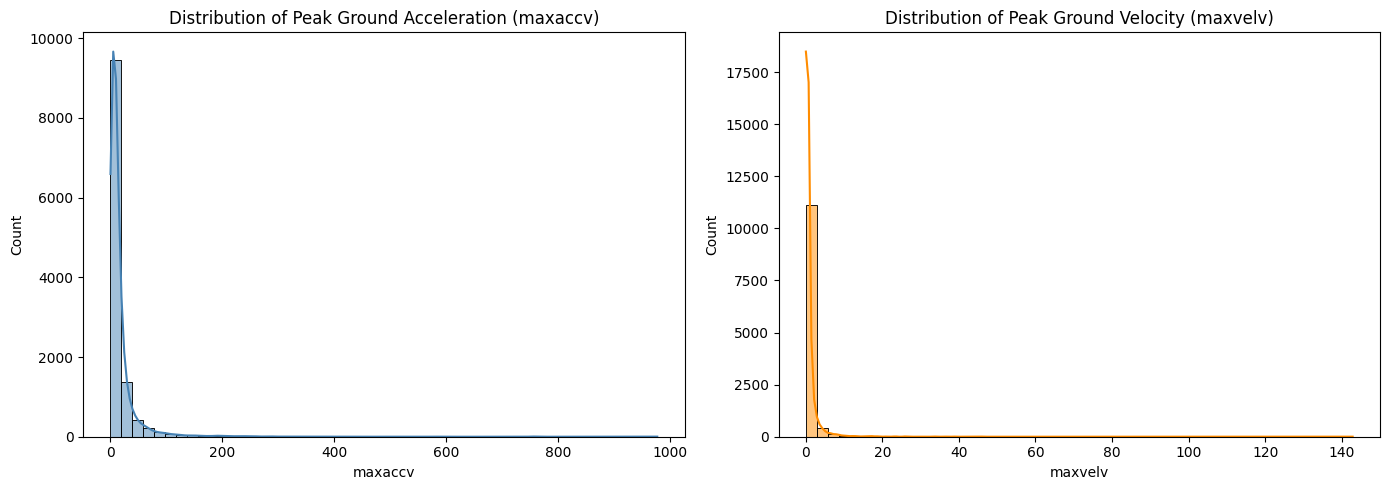

In [41]:
print(smrec_filtered[['maxaccv', 'maxvelv']].describe())

# Histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(smrec_filtered['maxaccv'], bins=50, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Peak Ground Acceleration (maxaccv)')

sns.histplot(smrec_filtered['maxvelv'], bins=50, kde=True, ax=axes[1], color='darkorange')
axes[1].set_title('Distribution of Peak Ground Velocity (maxvelv)')
plt.tight_layout()
plt.show()

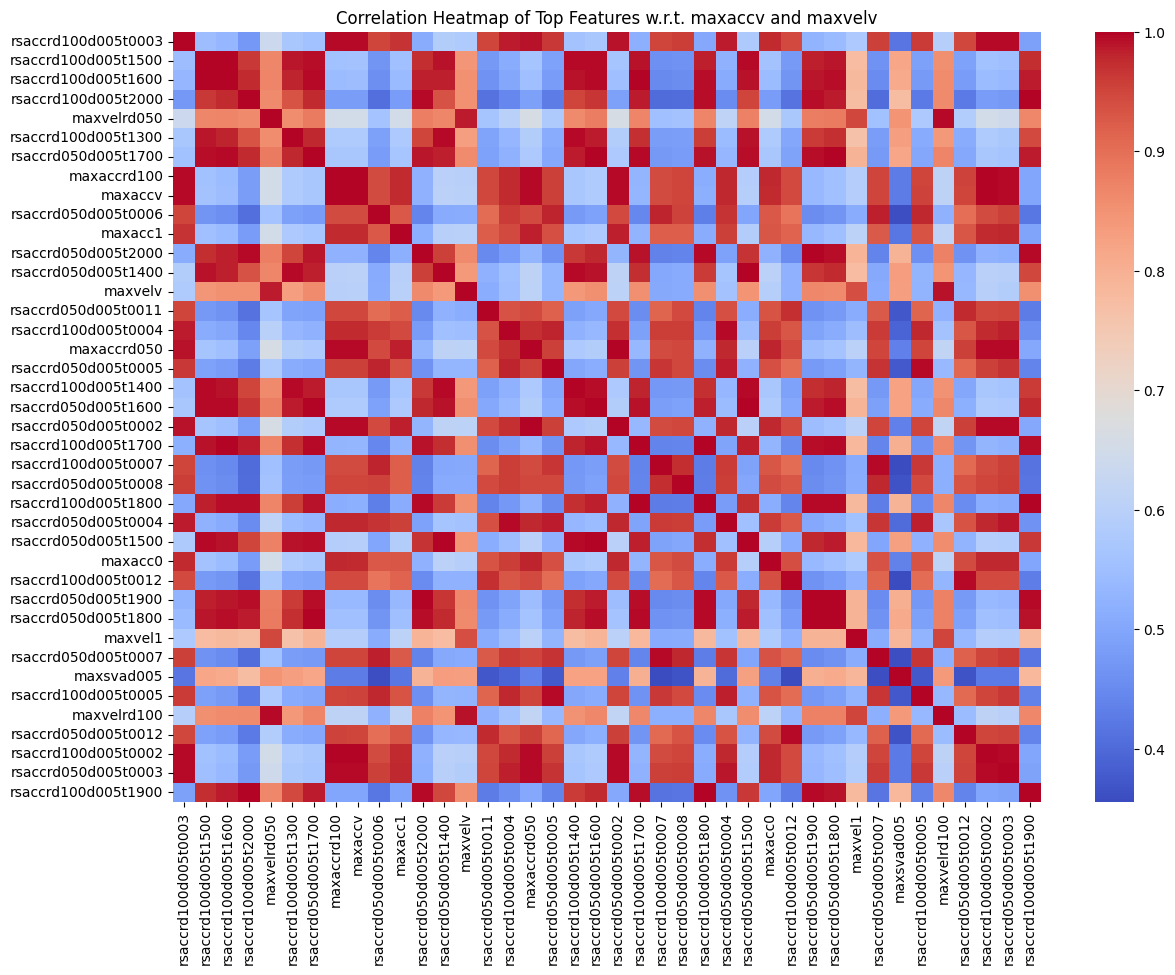

In [42]:
# Compute correlation with target
corr_matrix = smrec_filtered.corr(numeric_only=True)
top_corr_acc = corr_matrix['maxaccv'].dropna().abs().sort_values(ascending=False).head(20)
top_corr_vel = corr_matrix['maxvelv'].dropna().abs().sort_values(ascending=False).head(20)

# Combine for heatmap
top_features = list(set(top_corr_acc.index).union(set(top_corr_vel.index)))

plt.figure(figsize=(14, 10))
sns.heatmap(smrec_filtered[top_features].corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top Features w.r.t. maxaccv and maxvelv')
plt.show()


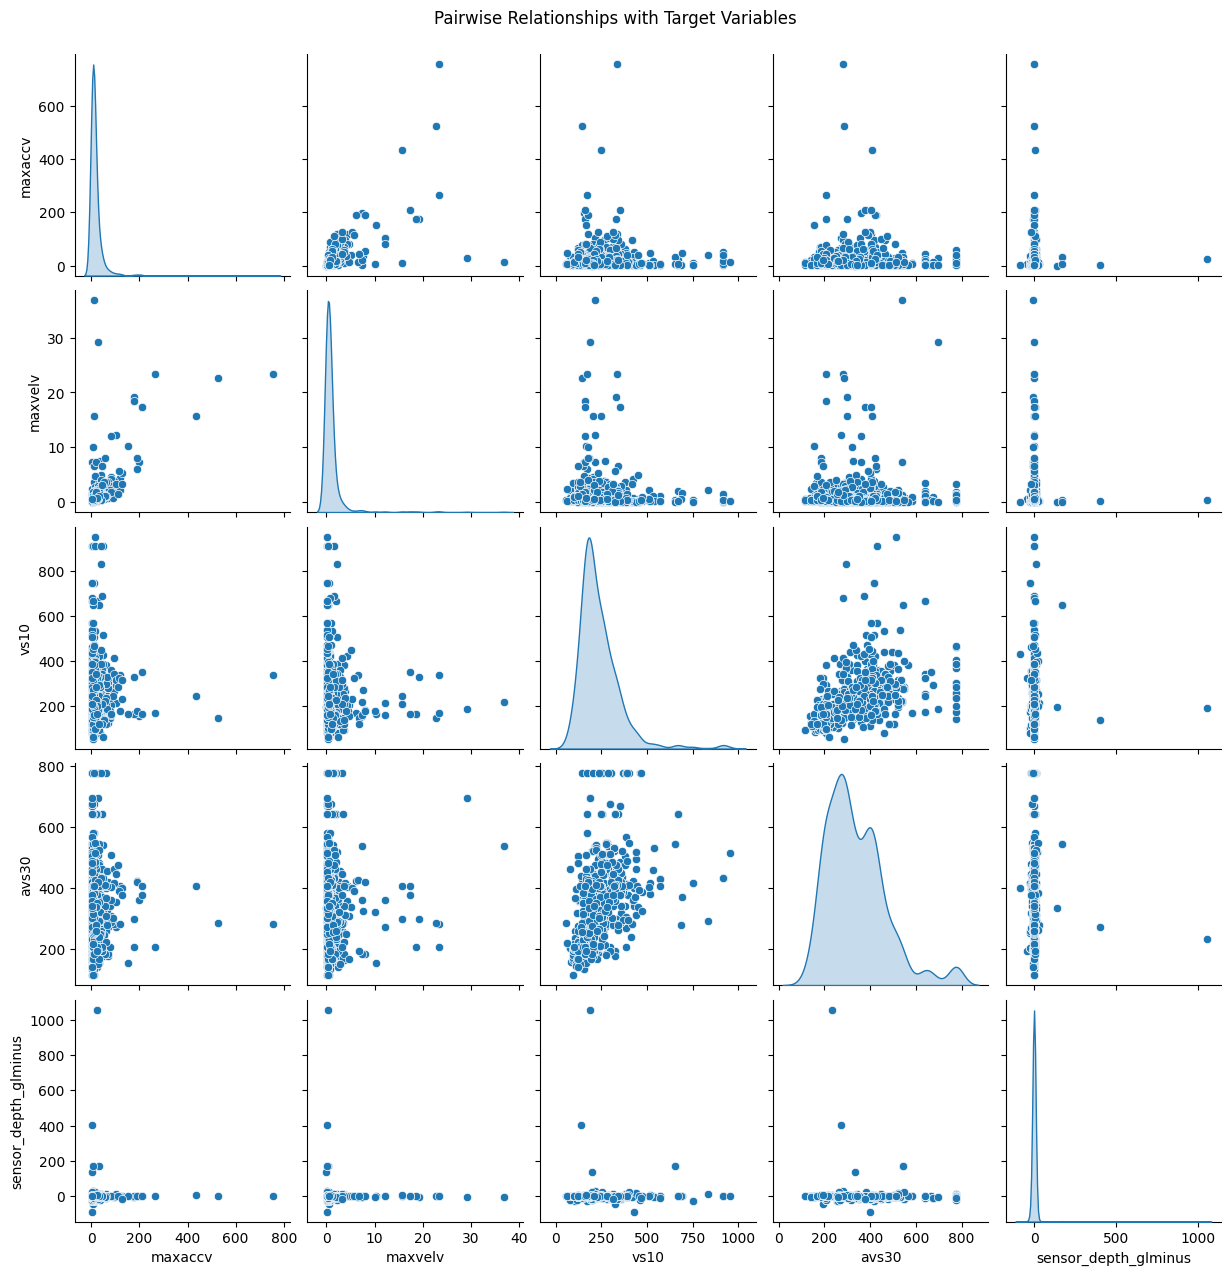

In [43]:
# Optional: Visualize scatterplots of key variables
sample_df = smrec_filtered.sample(n=1000, random_state=1)
sns.pairplot(sample_df[['maxaccv', 'maxvelv', 'vs10', 'avs30', 'sensor_depth_glminus']], diag_kind='kde')
plt.suptitle('Pairwise Relationships with Target Variables', y=1.02)
plt.show()


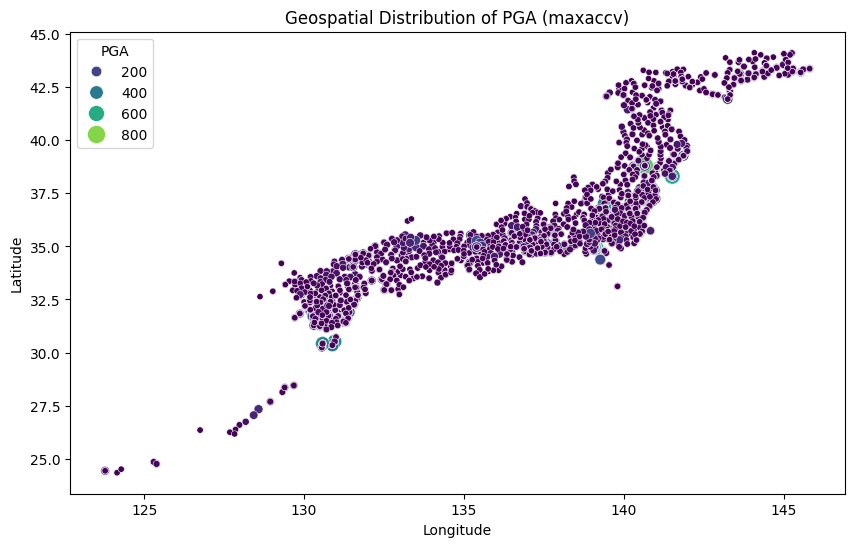

In [44]:
# Scatter of targets on map
plt.figure(figsize=(10, 6))
sns.scatterplot(data=smrec_filtered, x='lon', y='lat', hue='maxaccv', palette='viridis', size='maxaccv', sizes=(20, 200))
plt.title("Geospatial Distribution of PGA (maxaccv)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="PGA")
plt.show()


#Feature Enginnering

In [45]:
smrec_filtered.describe()

,smrec_id,site_id,eq_source_id,length_x,samplefreq,maxacc0,maxacc1,maxacc2,maxaccrd050,maxaccrd100,...,cmt_depth,varred,mxx,mxy,mxz,myy,myz,mzz,exp,eq_location_type_id_source
count,1.182000e+04,1.182000e+04,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,...,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,1.182000e+04,11820.000000
mean,6.892490e+05,1.105792e+07,1353.538409,7243.316413,100.304569,14.208320,14.381861,6.767455,14.333809,17.427655,...,31.746701,85.699408,0.690038,0.088564,0.066628,-0.698049,-0.592780,0.057130,6.262648e+16,1.840102
std,3.773045e+05,6.063675e+04,667.664594,4794.566597,5.510595,33.667631,32.029215,14.373992,32.432084,39.832154,...,20.010103,5.971888,1.559366,1.499120,0.989821,1.335143,1.202484,1.236941,2.083643e+17,0.869026
min,1.131500e+04,1.100011e+07,326.000000,3000.000000,100.000000,0.148639,0.301112,0.069996,0.226272,0.318671,...,5.000000,53.260000,-6.245600,-8.936000,-5.432100,-6.591000,-8.048300,-5.911200,1.000000e+13,1.000000
25%,3.925428e+05,1.103061e+07,723.000000,5900.000000,100.000000,3.659769,3.701355,1.752679,3.749824,4.463239,...,29.000000,86.340000,0.693300,0.219100,0.046500,-0.525000,-0.433300,-0.080400,1.000000e+16,1.000000
50%,7.351335e+05,1.105421e+07,1207.000000,5900.000000,100.000000,6.379090,6.484248,3.232069,6.470576,7.790287,...,29.000000,86.340000,0.693300,0.219100,0.046500,-0.525000,-0.433300,-0.080400,1.000000e+16,2.000000
75%,1.054233e+06,1.108131e+07,1968.000000,5900.000000,100.000000,12.853458,13.298116,6.560563,13.175692,15.767885,...,29.000000,86.340000,0.693300,0.219100,0.046500,-0.525000,-0.433300,-0.080400,1.000000e+16,3.000000
max,1.334209e+06,1.207711e+07,2455.000000,29900.000000,200.000000,902.098148,901.046721,384.297941,879.330135,976.540353,...,101.000000,96.530000,8.267200,7.740800,6.263200,6.279600,6.482400,6.975800,1.000000e+18,3.000000


In [46]:
# Display sampling frequency values
sampling_freq_stats = smrec_filtered['samplefreq'].describe()
unique_sampling_freqs = smrec_filtered['samplefreq'].unique()

sampling_freq_stats, unique_sampling_freqs


(count    11820.000000
 mean       100.304569
 std          5.510595
 min        100.000000
 25%        100.000000
 50%        100.000000
 75%        100.000000
 max        200.000000
 Name: samplefreq, dtype: float64,
 array([100., 200.]))

In [47]:
smrec_filtered.columns.tolist()

['smrec_id',
 'site_id',
 'eq_source_id',
 'length_x',
 'samplefreq',
 'maxacc0',
 'maxacc1',
 'maxacc2',
 'maxaccrd050',
 'maxaccrd100',
 'maxvel0',
 'maxvel1',
 'maxvel2',
 'maxvel0_filchb1',
 'maxvel1_filchb1',
 'maxvel2_filchb1',
 'maxvelrd050',
 'maxvelrd100',
 'maxvelrd050_filchb1',
 'maxvelrd100_filchb1',
 'maxaccv',
 'maxvelv',
 'maxvelv_filchb1',
 'sival',
 'sindo',
 'rsaccc2d005t0002',
 'rsaccc2d005t0003',
 'rsaccc2d005t0004',
 'rsaccc2d005t0005',
 'rsaccc2d005t0006',
 'rsaccc2d005t0007',
 'rsaccc2d005t0008',
 'rsaccc2d005t0009',
 'rsaccc2d005t0010',
 'rsaccc2d005t0011',
 'rsaccc2d005t0012',
 'rsaccc2d005t0013',
 'rsaccc2d005t0015',
 'rsaccc2d005t0020',
 'rsaccc2d005t0022',
 'rsaccc2d005t0025',
 'rsaccc2d005t0030',
 'rsaccc2d005t0035',
 'rsaccc2d005t0040',
 'rsaccc2d005t0045',
 'rsaccc2d005t0050',
 'rsaccc2d005t0060',
 'rsaccc2d005t0070',
 'rsaccc2d005t0080',
 'rsaccc2d005t0090',
 'rsaccc2d005t0100',
 'rsaccc2d005t0110',
 'rsaccc2d005t0120',
 'rsaccc2d005t0130',
 'rsaccc2d005

In [48]:
df=smrec_filtered

In [49]:
df['pga'] = np.sqrt(df['maxacc0']**2 + df['maxacc1']**2 + df['maxacc2']**2)
df['pgv'] = np.sqrt(df['maxvel0']**2 + df['maxvel1']**2 + df['maxvel2']**2)

In [50]:
leakage_columns = [
    # Used to compute targets
    'maxacc0', 'maxacc1', 'maxacc2',
    'maxvel0', 'maxvel1', 'maxvel2',

    # Redundant target representations
    'maxaccv', 'maxvelv', 'maxvelv_filchb1',

    # Filtered versions
    'maxvel0_filchb1', 'maxvel1_filchb1', 'maxvel2_filchb1',
    'maxvelrd050_filchb1', 'maxvelrd100_filchb1',

    # Already-derived
    'vel_mean', 'vel_max', 'vel_min', 'vel_std', 'vel_range', 'vel_sum',
    'vel_filt_mean', 'vel_filt_max', 'vel_filt_min', 'vel_filt_std', 'vel_filt_range', 'vel_filt_sum',
    'vel_filt_ratio_to_raw',
]

df.drop(columns=[col for col in leakage_columns if col in df.columns], inplace=True)


In [51]:
# 1. Response Spectra - Raw (rsaccc2d005t****)
rsaccc_cols = [col for col in df.columns if col.startswith('rsaccc2d005t')]
df['rsaccc_mean'] = df[rsaccc_cols].mean(axis=1)
df['rsaccc_std'] = df[rsaccc_cols].std(axis=1)
df['rsaccc_max'] = df[rsaccc_cols].max(axis=1)
df['rsaccc_min'] = df[rsaccc_cols].min(axis=1)
df['rsaccc_range'] = df['rsaccc_max'] - df['rsaccc_min']
df['rsaccc_sum'] = df[rsaccc_cols].sum(axis=1)
df['rsaccc_iqr'] = df[rsaccc_cols].quantile(0.75, axis=1) - df[rsaccc_cols].quantile(0.25, axis=1)

# 2. Response Spectra - Rotated (rsaccrd050 and rsaccrd100)
rsaccrd050_cols = [col for col in df.columns if col.startswith('rsaccrd050d005t')]
rsaccrd100_cols = [col for col in df.columns if col.startswith('rsaccrd100d005t')]

df['rsaccrd050_mean'] = df[rsaccrd050_cols].mean(axis=1)
df['rsaccrd050_std'] = df[rsaccrd050_cols].std(axis=1)
df['rsaccrd050_max'] = df[rsaccrd050_cols].max(axis=1)

df['rsaccrd100_mean'] = df[rsaccrd100_cols].mean(axis=1)
df['rsaccrd100_std'] = df[rsaccrd100_cols].std(axis=1)
df['rsaccrd100_max'] = df[rsaccrd100_cols].max(axis=1)
df['rsaccc_energy'] = np.square(df.filter(like='rsaccc2d')).sum(axis=1)
df['rsaccrd_energy'] = np.square(df.filter(like='rsaccrd')).sum(axis=1)

rsaccc_cols = df.filter(like='rsaccc2d').columns
rsaccrd_cols = df.filter(like='rsaccrd').columns
rsaccc_df = np.log(df[rsaccc_cols] + 1e-6)
rsaccrd_df = np.log(df[rsaccrd_cols] + 1e-6)

df['rsaccc_logdiff_mean'] = rsaccc_df.diff(axis=1).mean(axis=1)
df['rsaccrd_logdiff_mean'] = rsaccrd_df.diff(axis=1).mean(axis=1)

# Hypocenter location features (difference between EQ and site)
df['hypo_dist_km'] = ((df['nf_lat'] - df['lat'])**2 + (df['nf_lon'] - df['lon'])**2)**0.5 * 111  # rough lat/lon to km
df['hypo_depth'] = df['nf_depth']  # already present

# Moment tensor magnitude
df['moment_tensor_energy'] = (df['mxx']**2 + df['myy']**2 + df['mzz']**2 + 2*(df['mxy']**2 + df['mxz']**2 + df['myz']**2))**0.5

# Basic EQ features
df['magnitude_diff'] = df['mjma'] - df['mw']
df['is_shallow_eq'] = (df['nf_depth'] < 70).astype(int)

# Fault geometry features
df['rake_dip_product'] = df['rake1'] * df['dip1']
df['strike_dip_ratio'] = df['strike1'] / (df['dip1'] + 1e-6)

# Site location context
df['site_elevation_depth_diff'] = df['elevation'] - df['sensor_depth_glminus']
df['vs10_vs30_ratio'] = df['vs10'] / (df['avs30'] + 1e-6)

# Subsurface properties
df['d1400_to_d1100'] = df['d1400'] - df['d1100']
df['d1700_to_d1100'] = df['d1700'] - df['d1100']
df['d2100_to_d1100'] = df['d2100'] - df['d1100']
df['dbase_diff'] = df['dbase'] - df[['d1100', 'd1400', 'd1700', 'd2100']].min(axis=1)

# Meshcode-derived features
df['mesh_diff'] = df['meshcode3'] - df['meshcode250']
df['mesh_ratio'] = df['meshcode3'] / (df['meshcode250'] + 1e-6)

# Energy and site interaction
df['site_energy_ratio'] = df['moment_tensor_energy'] / (df['avs30'] + 1e-6)
df['depth_vs_site'] = df['nf_depth'] / (df['sensor_depth_glminus'] + 1e-3)
df['strike_magnitude_ratio'] = df['strike1'] / (df['mjma'] + 1e-6)
df['dip_depth_product'] = df['dip1'] * df['nf_depth']
df['site_vs_mesh'] = df['avs30'] / (df['meshcode250'] + 1e-6)

# Normalized lat/lon difference
df['lat_offset'] = df['nf_lat'] - df['lat']
df['lon_offset'] = df['nf_lon'] - df['lon']
df['geo_angle'] = np.arctan2(df['lat_offset'], df['lon_offset'])  # direction of wave travel


df['jem_origin_time'] = pd.to_datetime(df['jem_origin_time'], format='mixed', errors='coerce')
df['jem_hour'] = df['jem_origin_time'].dt.hour
df['jem_month'] = df['jem_origin_time'].dt.month
df['is_night'] = df['jem_hour'].apply(lambda x: 1 if pd.notnull(x) and (x < 6 or x > 18) else 0)
df['rake_strike_ratio'] = df['rake1'] / (df['strike1'] + 1e-6)
df['dip_sin'] = np.sin(np.radians(df['dip1']))
df['strike_cos'] = np.cos(np.radians(df['strike1']))
df['magnitude_diff'] = df['mw'] - df['mjma']

df['eq_to_nf_depth_diff'] = df['jem_depth'] - df['nf_depth']
df['sensor_relative_to_eq_depth'] = df['sensor_depth_glminus'] - df['jem_depth']
df['depth_ratio_nf_eq'] = df['nf_depth'] / (df['jem_depth'] + 1e-6)
df['depth_grad_d1100_1400'] = df['d1100'] - df['d1400']

df['vs10_by_avs30'] = df['vs10'] / (df['avs30'] + 1e-6)
df['elevation_by_vs10'] = df['elevation'] / (df['vs10'] + 1e-6)
df['elevation_by_avs30'] = df['elevation'] / (df['avs30'] + 1e-6)


In [60]:
# Haversine distances
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    return 2 * R * arctan2(sqrt(a), sqrt(1 - a))

df['site_to_eq_km'] = haversine(df['lat'], df['lon'], df['jem_lat'], df['jem_lon'])
df['site_to_nf_km'] = haversine(df['lat'], df['lon'], df['nf_lat'], df['nf_lon'])


In [63]:
cat_cols = ['obs_network_id', 'installation_situation_id', 'eq_location_type_id']
df = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols, drop_first=True)


In [64]:
df = df.loc[:, ~df.T.duplicated()]

In [65]:
log_candidates = []

for col in df.select_dtypes(include=[np.number]).columns:
    try:
        if df[col].min() > 0:
            log_candidates.append(col)
    except:
        continue  # skip problematic columns

# Create log-transformed features
for col in log_candidates:
    df[f'{col}_log'] = np.log(df[col] + 1e-6)


<ipython-input-65-89f5e5c9065e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_log'] = np.log(df[col] + 1e-6)
<ipython-input-65-89f5e5c9065e>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_log'] = np.log(df[col] + 1e-6)
<ipython-input-65-89f5e5c9065e>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

In [66]:
df['rd_max'] = df.filter(like='rsaccrd').max(axis=1)


<ipython-input-66-ce112272b08b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rd_max'] = df.filter(like='rsaccrd').max(axis=1)


In [67]:
df['accvel_rd050_ratio'] = df['maxaccrd050'] / (df['maxvelrd050'] + 1e-6)
df['accvel_rd100_ratio'] = df['maxaccrd100'] / (df['maxvelrd100'] + 1e-6)
df['accvel_ratio_diff'] = df['accvel_rd100_ratio'] - df['accvel_rd050_ratio']


<ipython-input-67-3af4dde97837>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['accvel_rd050_ratio'] = df['maxaccrd050'] / (df['maxvelrd050'] + 1e-6)
<ipython-input-67-3af4dde97837>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['accvel_rd100_ratio'] = df['maxaccrd100'] / (df['maxvelrd100'] + 1e-6)
<ipython-input-67-3af4dde97837>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

In [68]:
rsaccrd_cols = [col for col in df.columns if 'rsaccrd' in col and 'log' not in col]
rsaccc_cols = [col for col in df.columns if 'rsaccc' in col and 'log' not in col]

df['rsaccrd_skew'] = df[rsaccrd_cols].apply(skew, axis=1)
df['rsaccrd_kurtosis'] = df[rsaccrd_cols].apply(kurtosis, axis=1)
df['rsaccc_skew'] = df[rsaccc_cols].apply(skew, axis=1)
df['rsaccc_kurtosis'] = df[rsaccc_cols].apply(kurtosis, axis=1)


<ipython-input-68-7200536d16f1>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsaccrd_skew'] = df[rsaccrd_cols].apply(skew, axis=1)
<ipython-input-68-7200536d16f1>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsaccrd_kurtosis'] = df[rsaccrd_cols].apply(kurtosis, axis=1)
<ipython-input-68-7200536d16f1>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

In [69]:
# Split spectrum columns into early (first 20%) and late (last 20%)
early_cols = rsaccrd_cols[:len(rsaccrd_cols)//5]
late_cols = rsaccrd_cols[-len(rsaccrd_cols)//5:]

df['rsaccrd_energy_early'] = df[early_cols].sum(axis=1)
df['rsaccrd_energy_late'] = df[late_cols].sum(axis=1)
df['rsaccrd_energy_decay_ratio'] = df['rsaccrd_energy_early'] / (df['rsaccrd_energy_late'] + 1e-6)


<ipython-input-69-169136029c2d>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsaccrd_energy_early'] = df[early_cols].sum(axis=1)
<ipython-input-69-169136029c2d>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsaccrd_energy_late'] = df[late_cols].sum(axis=1)
<ipython-input-69-169136029c2d>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a d

In [70]:
# Index of max response as a proxy for timing
df['rsaccrd_peak_index'] = df[rsaccrd_cols].idxmax(axis=1).apply(lambda x: rsaccrd_cols.index(x))
df['rsaccrd_peak_norm'] = df['rsaccrd_peak_index'] / len(rsaccrd_cols)  # normalized position


<ipython-input-70-b8466fda404b>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsaccrd_peak_index'] = df[rsaccrd_cols].idxmax(axis=1).apply(lambda x: rsaccrd_cols.index(x))
<ipython-input-70-b8466fda404b>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsaccrd_peak_norm'] = df['rsaccrd_peak_index'] / len(rsaccrd_cols)  # normalized position


In [71]:
# Arias Intensity estimate from acceleration squared
acc_cols = df.filter(like='rsaccc2d').columns
df['arias_intensity'] = df[acc_cols].pow(2).sum(axis=1)


<ipython-input-71-1315b39e88c5>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['arias_intensity'] = df[acc_cols].pow(2).sum(axis=1)


In [72]:
# Avoid earlier `.diff()` on ndarray issue
log_spec = np.log(df[acc_cols] + 1e-6)
df['spectral_slope'] = log_spec.diff(axis=1).mean(axis=1)


/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
<ipython-input-72-a5bd5fb3a13d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['spectral_slope'] = log_spec.diff(axis=1).mean(axis=1)


In [73]:
response_cols = [col for col in df.columns if col.startswith('rsaccrd100d005t') and not col.endswith('_log')]
resp_times = np.array([int(col.split('t')[-1]) for col in response_cols])
peak_indices = np.argmax(df[response_cols].values, axis=1)
df['peak_resp_time'] = resp_times[peak_indices]


<ipython-input-73-3cc4afce5a18>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['peak_resp_time'] = resp_times[peak_indices]


In [74]:
df['cumulative_rms_energy'] = np.sqrt((df[acc_cols] ** 2).mean(axis=1))


<ipython-input-74-daa9b33c0386>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cumulative_rms_energy'] = np.sqrt((df[acc_cols] ** 2).mean(axis=1))


In [75]:
df['spectral_flatness'] = df[acc_cols].apply(lambda row: row.std() / row.mean(), axis=1)


<ipython-input-75-f040ebb0ec07>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['spectral_flatness'] = df[acc_cols].apply(lambda row: row.std() / row.mean(), axis=1)


In [76]:
df['first_peak_resp_time'] = df[response_cols].apply(lambda row: resp_times[np.argmax(row.values > 0)], axis=1)


<ipython-input-76-0c31dea7c57e>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['first_peak_resp_time'] = df[response_cols].apply(lambda row: resp_times[np.argmax(row.values > 0)], axis=1)


In [77]:
df['rsaccrd_shape_factor'] = df[response_cols].mean(axis=1) / df[response_cols].max(axis=1)


<ipython-input-77-e19f99c354a3>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsaccrd_shape_factor'] = df[response_cols].mean(axis=1) / df[response_cols].max(axis=1)


In [78]:
from scipy.stats import skew
df['rsaccrd_skewness'] = df[response_cols].apply(lambda x: skew(x), axis=1)


<ipython-input-78-169b62bbd522>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsaccrd_skewness'] = df[response_cols].apply(lambda x: skew(x), axis=1)


In [79]:
df['rsaccrd_cumsum'] = df[response_cols].sum(axis=1)


<ipython-input-79-347925654b19>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsaccrd_cumsum'] = df[response_cols].sum(axis=1)


In [80]:
# Transpose, drop duplicates, and transpose back
df = df.loc[:, ~df.T.duplicated()]


In [81]:
df.shape

(11820, 548)

In [82]:
df.iloc[0]

,0
smrec_id,438556
site_id,11044111
eq_source_id,326
length_x,5900.0
samplefreq,100.0
...,...
spectral_flatness,-2.244377
first_peak_resp_time,2
rsaccrd_shape_factor,0.193452
rsaccrd_skewness,1.45539


In [83]:
y_pga = df['pga_log']
y_pgv = df['pgv_log']

In [84]:
df.columns.tolist()

['smrec_id',
 'site_id',
 'eq_source_id',
 'length_x',
 'samplefreq',
 'maxaccrd050',
 'maxaccrd100',
 'maxvelrd050',
 'maxvelrd100',
 'sival',
 'sindo',
 'rsaccc2d005t0002',
 'rsaccc2d005t0003',
 'rsaccc2d005t0004',
 'rsaccc2d005t0005',
 'rsaccc2d005t0006',
 'rsaccc2d005t0007',
 'rsaccc2d005t0008',
 'rsaccc2d005t0009',
 'rsaccc2d005t0010',
 'rsaccc2d005t0011',
 'rsaccc2d005t0012',
 'rsaccc2d005t0013',
 'rsaccc2d005t0015',
 'rsaccc2d005t0020',
 'rsaccc2d005t0022',
 'rsaccc2d005t0025',
 'rsaccc2d005t0030',
 'rsaccc2d005t0035',
 'rsaccc2d005t0040',
 'rsaccc2d005t0045',
 'rsaccc2d005t0050',
 'rsaccc2d005t0060',
 'rsaccc2d005t0070',
 'rsaccc2d005t0080',
 'rsaccc2d005t0090',
 'rsaccc2d005t0100',
 'rsaccc2d005t0110',
 'rsaccc2d005t0120',
 'rsaccc2d005t0130',
 'rsaccc2d005t0150',
 'rsaccc2d005t0170',
 'rsaccc2d005t0200',
 'rsaccc2d005t0220',
 'rsaccc2d005t0250',
 'rsaccc2d005t0300',
 'rsaccc2d005t0350',
 'rsaccc2d005t0400',
 'rsaccc2d005t0450',
 'rsaccc2d005t0500',
 'rsaccc2d005t0550',
 'rsac

#FEATURE SELECTION

In [85]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_cols].nunique().sort_values()


,0
obs_network_id_2,2
eq_location_type_id_3,2
eq_location_type_id_2,2
installation_situation_id_2,2
start_date,143
end_date,145
jem_origin_time,404


In [86]:
# Columns known to be irrelevant
irrelevant_cols = [
    'record_id', 'file_name', 'station_code', 'network_code',  # purely identifiers
    'location', 'component', 'download_time', 'raw_filename',
    'trigger_type', 'file_type'
]

df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns])


In [87]:
for col in ['start_date', 'end_date', 'jem_origin_time']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

    # You can extract relevant components
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_dayofyear'] = df[col].dt.dayofyear
    df[f'{col}_weekday'] = df[col].dt.weekday


<ipython-input-87-4295f7abd677>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_year'] = df[col].dt.year
<ipython-input-87-4295f7abd677>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_month'] = df[col].dt.month
<ipython-input-87-4295f7abd677>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

In [88]:
df.drop(columns=['start_date', 'end_date', 'jem_origin_time'], inplace=True)


In [89]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


variance_thresholding

In [90]:
# Remove features with zero variance
selector = VarianceThreshold(threshold=1e-4)
X_var = selector.fit_transform(df)
df = df[df.columns[selector.get_support(indices=True)]]


In [91]:
skewed = df.select_dtypes(include=[np.number]).apply(lambda x: skew(x.dropna()))
skewed_feats = skewed[abs(skewed) > 2].index  # or 1 for moderately skewed

for feat in skewed_feats:
    if df[feat].min() > 0:  # log only if strictly positive
        df[f'{feat}_log'] = np.log1p(df[feat])

<ipython-input-91-b0a25e0da7fd>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feat}_log'] = np.log1p(df[feat])
<ipython-input-91-b0a25e0da7fd>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feat}_log'] = np.log1p(df[feat])
<ipython-input-91-b0a25e0da7fd>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfram

In [92]:
qt = QuantileTransformer(output_distribution='normal')
df[feat + '_qt'] = qt.fit_transform(df[[feat]])


<ipython-input-92-b0d8d5ba5915>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feat + '_qt'] = qt.fit_transform(df[[feat]])


In [93]:
df.describe()

,smrec_id,site_id,eq_source_id,length_x,samplefreq,maxaccrd050,maxaccrd100,maxvelrd050,maxvelrd100,sival,...,rsaccrd_energy_late_log,rsaccrd_energy_decay_ratio_log,arias_intensity_log,peak_resp_time_log,cumulative_rms_energy_log,rsaccrd_cumsum_log,start_date_year_log,start_date_month_log,start_date_dayofyear_log,start_date_weekday_qt
count,1.182000e+04,1.182000e+04,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,...,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000,11820.000000
mean,6.892490e+05,1.105792e+07,1353.538409,7243.316413,100.304569,14.333809,17.427655,0.744374,0.931656,0.815715,...,9.700984,0.034184,7.735344,2.816830,1.718231,5.980861,7.600442,0.867603,1.312512,-4.252048
std,3.773045e+05,6.063675e+04,667.664594,4794.566597,5.510595,32.432084,39.832154,1.954706,2.555409,2.078954,...,1.896137,0.028554,1.433128,0.608753,0.618418,0.944377,0.002837,0.475020,1.538454,2.425117
min,1.131500e+04,1.100011e+07,326.000000,3000.000000,100.000000,0.226272,0.318671,0.025843,0.030273,0.014290,...,2.539797,0.000216,5.022191,1.609438,0.756244,2.356875,7.599401,0.693147,0.693147,-5.199338
25%,3.925428e+05,1.103061e+07,723.000000,5900.000000,100.000000,3.749824,4.463239,0.167875,0.204608,0.164616,...,8.275374,0.014009,6.752009,2.397895,1.306017,5.275137,7.599401,0.693147,0.693147,-5.199338
50%,7.351335e+05,1.105421e+07,1207.000000,5900.000000,100.000000,6.470576,7.790287,0.313476,0.382592,0.321323,...,9.358118,0.028526,7.296449,2.639057,1.511692,5.803190,7.599401,0.693147,0.693147,-5.199338
75%,1.054233e+06,1.108131e+07,1968.000000,5900.000000,100.000000,13.175692,15.767885,0.650664,0.806161,0.708519,...,10.759621,0.048701,8.369195,3.135494,1.952239,6.506430,7.599401,0.693147,0.693147,-5.199338
max,1.334209e+06,1.207711e+07,2455.000000,29900.000000,200.000000,879.330135,976.540353,99.362417,140.448681,55.623985,...,19.130198,0.747024,16.774755,5.398163,6.004506,10.828055,7.612831,2.564949,5.883322,5.199338


Model-Based Feature Importance (LightGBM)

In [94]:
# Define leakage and identifier columns to exclude (add more if you find any)
exclude_cols = [
    'pga', 'pgv', 'pga_log','pgv_log',            # Original (non-log) targets, if they still exist
    'site_id', 'smrec_id',     # Identifiers
    'eq_source_id', 'obs_network_id',
    'jem_origin_time', 'start_date', 'end_date',  # timestamps
] + target_cols  # Include target columns in exclusion from feature matrix

# Construct feature matrix X
X = df.drop(columns=[col for col in exclude_cols if col in df.columns])


print(f"Feature matrix shape: {X.shape}")


Feature matrix shape: (11820, 564)


In [95]:
def plot_lgbm_importance(X, y, target_name):
    lgbm = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
    lgbm.fit(X, y)

    importances = lgbm.feature_importances_
    indices = np.argsort(importances)[::-1][:30]

    plt.figure(figsize=(10, 8))
    plt.barh(np.array(X.columns)[indices][::-1], importances[indices][::-1])
    plt.xlabel('Feature Importance')
    plt.title(f'LightGBM Feature Importance for {target_name}')
    plt.tight_layout()
    plt.show()

    return pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.119570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126994
[LightGBM] [Info] Number of data points in the train set: 11820, number of used features: 563
[LightGBM] [Info] Start training from score 2.464393


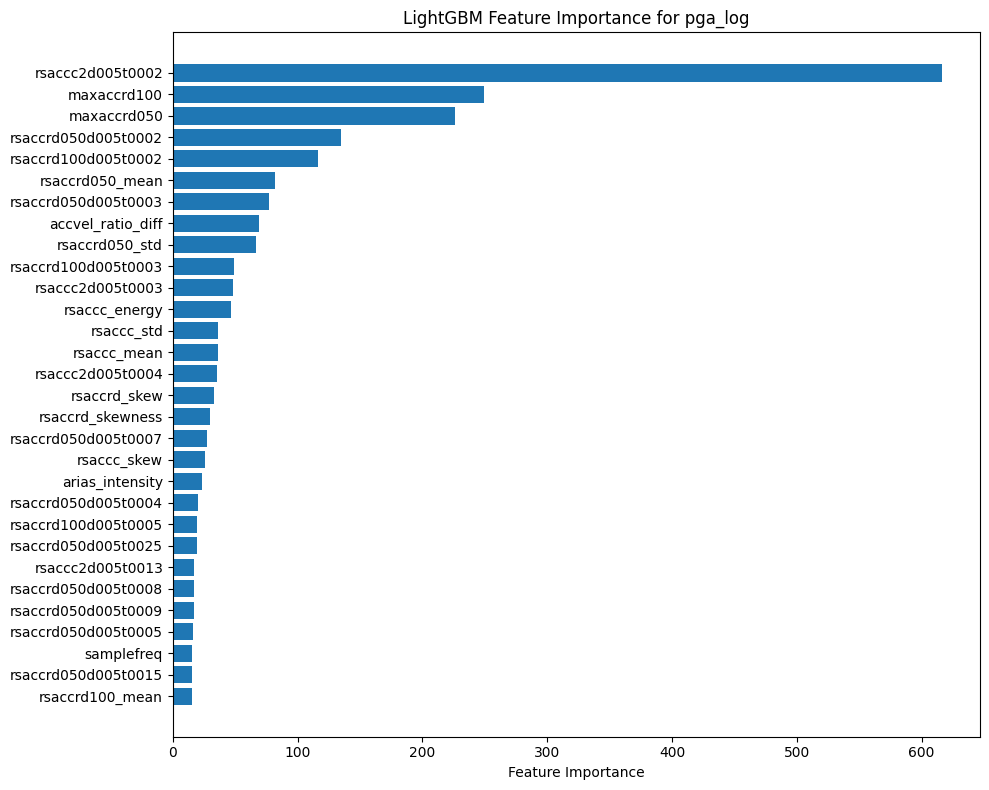

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 126994
[LightGBM] [Info] Number of data points in the train set: 11820, number of used features: 563
[LightGBM] [Info] Start training from score -0.577665


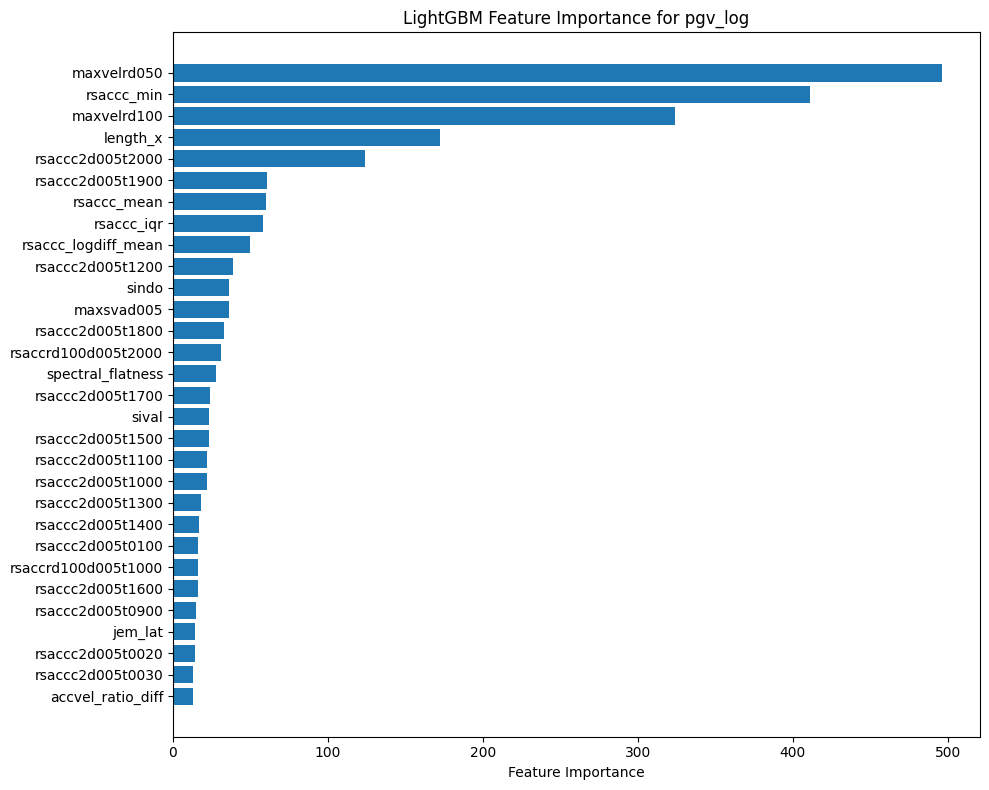

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12557
[LightGBM] [Info] Number of data points in the train set: 9456, number of used features: 50
[LightGBM] [Info] Start training from score 2.467561
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12560
[LightGBM] [Info] Number of data points in the train set: 9456, number of used features: 50
[LightGBM] [Info] Start training from score 2.453567
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12562
[LightGBM] [Info] Number of data points in the train set: 9456, number of used features: 50
[LightGBM] [Info] Start tra

In [96]:
import_pga = plot_lgbm_importance(X, y_pga, target_name="pga_log")
import_pgv = plot_lgbm_importance(X, y_pgv, target_name="pgv_log")

# Merge importances by averaging (normalized)
import_pga["importance"] /= import_pga["importance"].sum()
import_pgv["importance"] /= import_pgv["importance"].sum()

merged_importance = import_pga.merge(import_pgv, on="feature", suffixes=('_pga', '_pgv'))
merged_importance["avg_importance"] = (merged_importance["importance_pga"] + merged_importance["importance_pgv"]) / 2
merged_importance = merged_importance.sort_values(by="avg_importance", ascending=False).reset_index(drop=True)

# Select optimal number of features based on average CV MSE

k_values = list(range(50, 451, 50))
avg_mse_scores = []

for k in k_values:
    top_k_features = merged_importance.head(k)["feature"].tolist()
    X_k = X[top_k_features]

    model = LGBMRegressor(n_estimators=100, random_state=42)

    mse_pga = -cross_val_score(model, X_k, y_pga, scoring="neg_mean_squared_error", cv=5).mean()
    mse_pgv = -cross_val_score(model, X_k, y_pgv, scoring="neg_mean_squared_error", cv=5).mean()
    avg_mse = (mse_pga + mse_pgv) / 2

    avg_mse_scores.append(avg_mse)
    print(f"Top {k} features — MSE (PGA): {mse_pga:.5f}, MSE (PGV): {mse_pgv:.5f}, Avg: {avg_mse:.5f}")



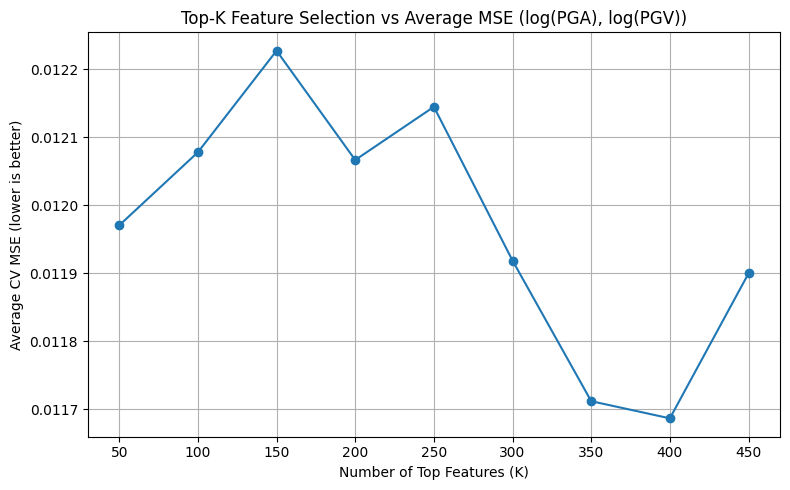

In [97]:
# Plot average MSE vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, avg_mse_scores, marker='o')
plt.title("Top-K Feature Selection vs Average MSE (log(PGA), log(PGV))")
plt.xlabel("Number of Top Features (K)")
plt.ylabel("Average CV MSE (lower is better)")
plt.grid(True)
plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24467
[LightGBM] [Info] Number of data points in the train set: 9456, number of used features: 100
[LightGBM] [Info] Start training from score 2.467561
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24508
[LightGBM] [Info] Number of data points in the train set: 9456, number of used features: 100
[LightGBM] [Info] Start training from score 2.453567
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24520
[LightGBM] [Info] Number of data points in the train set: 9456, number of used features: 100
[LightGBM] [Info] Start 

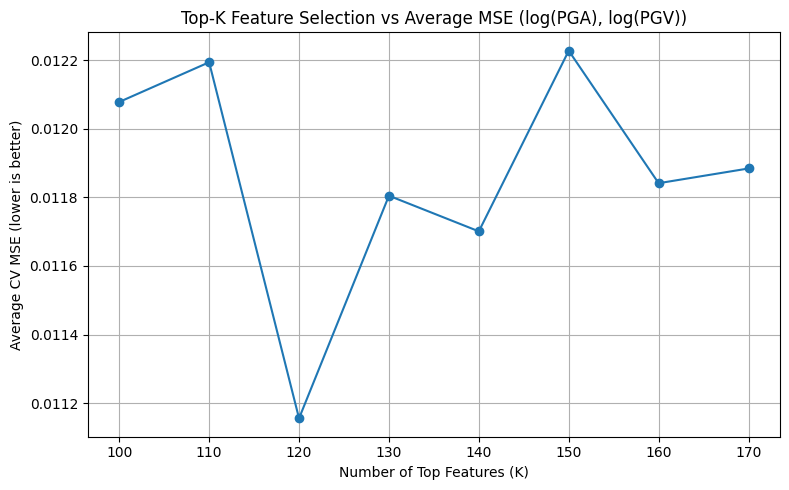

In [98]:
# Select optimal number of features based on average CV MSE

k_values = list(range(100, 180, 10))
avg_mse_scores = []

for k in k_values:
    top_k_features = merged_importance.head(k)["feature"].tolist()
    X_k = X[top_k_features]

    model = LGBMRegressor(n_estimators=100, random_state=42)

    mse_pga = -cross_val_score(model, X_k, y_pga, scoring="neg_mean_squared_error", cv=5).mean()
    mse_pgv = -cross_val_score(model, X_k, y_pgv, scoring="neg_mean_squared_error", cv=5).mean()
    avg_mse = (mse_pga + mse_pgv) / 2

    avg_mse_scores.append(avg_mse)
    print(f"Top {k} features — MSE (PGA): {mse_pga:.5f}, MSE (PGV): {mse_pgv:.5f}, Avg: {avg_mse:.5f}")

    # Plot average MSE vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, avg_mse_scores, marker='o')
plt.title("Top-K Feature Selection vs Average MSE (log(PGA), log(PGV))")
plt.xlabel("Number of Top Features (K)")
plt.ylabel("Average CV MSE (lower is better)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [99]:
# Final selected features based on avg_importance
top_150_features = merged_importance.head(150)["feature"].tolist()

# Reduce feature set for modeling
X_selected = X[top_150_features]


#DATA IMBALNCE

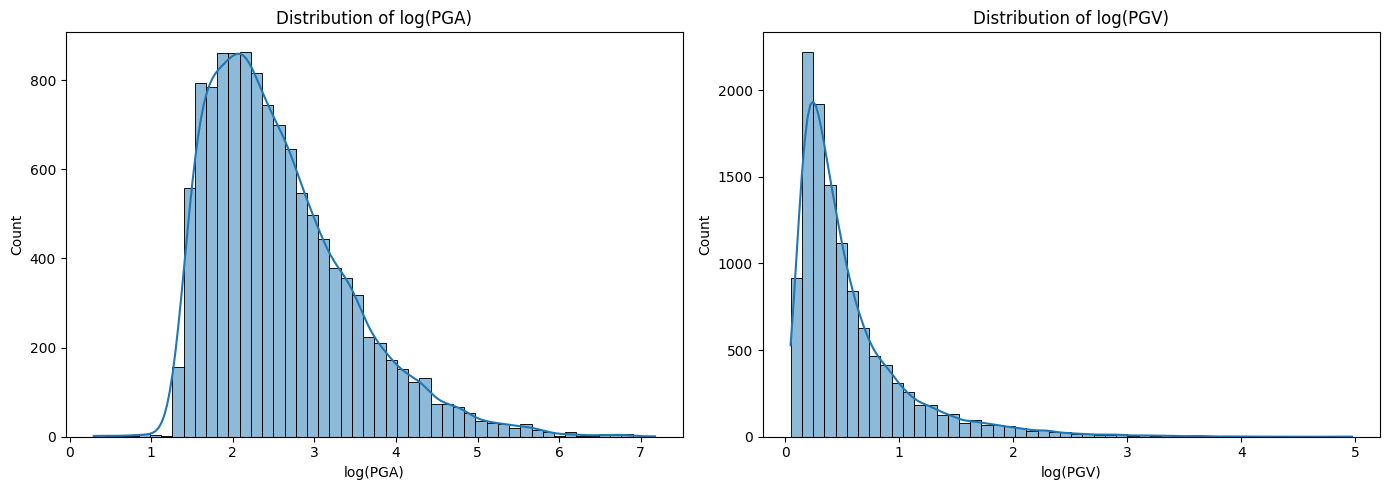

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['pga_log'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of log(PGA)')
axes[0].set_xlabel('log(PGA)')

sns.histplot(df['pgv_log'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of log(PGV)')
axes[1].set_xlabel('log(PGV)')

plt.tight_layout()
plt.show()


In [101]:
# Check 90th, 95th, 99th percentiles
for col in ['pga_log', 'pgv_log']:
    print(f"\n{col.upper()} Quantiles:")
    print(df[col].quantile([0.5, 0.75, 0.9, 0.95, 0.99, 1.0]))



PGA_LOG Quantiles:
0.50    2.392866
0.75    3.053699
0.90    3.776051
0.95    4.293238
0.99    5.338056
1.00    7.176291
Name: pga_log, dtype: float64

PGV_LOG Quantiles:
0.50    0.399042
0.75    0.696113
0.90    1.182143
0.95    1.605688
0.99    2.473718
1.00    4.970486
Name: pgv_log, dtype: float64


In [102]:
# Create bins and check counts
df['pga_bin'] = pd.qcut(df['pga_log'], q=10, duplicates='drop')
df['pgv_bin'] = pd.qcut(df['pgv_log'], q=10, duplicates='drop')

print("\nPGA bin distribution:\n", df['pga_bin'].value_counts().sort_index())
print("\nPGV bin distribution:\n", df['pgv_bin'].value_counts().sort_index())



PGA bin distribution:
 pga_bin
(0.294, 1.615]    1182
(1.615, 1.816]    1182
(1.816, 2.01]     1182
(2.01, 2.191]     1182
(2.191, 2.393]    1182
(2.393, 2.621]    1182
(2.621, 2.891]    1182
(2.891, 3.247]    1182
(3.247, 3.776]    1183
(3.776, 7.176]    1181
Name: count, dtype: int64

PGV bin distribution:
 pgv_bin
(0.0455, 0.156]    1182
(0.156, 0.209]     1182
(0.209, 0.264]     1182
(0.264, 0.324]     1182
(0.324, 0.399]     1182
(0.399, 0.487]     1182
(0.487, 0.613]     1182
(0.613, 0.812]     1182
(0.812, 1.182]     1182
(1.182, 4.97]      1182
Name: count, dtype: int64


<ipython-input-102-e488116960cf>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pga_bin'] = pd.qcut(df['pga_log'], q=10, duplicates='drop')
<ipython-input-102-e488116960cf>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pgv_bin'] = pd.qcut(df['pgv_log'], q=10, duplicates='drop')


In [103]:
# Get frequency of each bin
pga_bin_counts = Counter(df['pga_bin'])
pgv_bin_counts = Counter(df['pgv_bin'])

# Define inverse frequency weights
df['pga_weight'] = df['pga_bin'].map(lambda x: 1 / (pga_bin_counts[x] + 1e-6))
df['pgv_weight'] = df['pgv_bin'].map(lambda x: 1 / (pgv_bin_counts[x] + 1e-6))

# Normalize weights (optional but recommended)
df['pga_weight'] /= df['pga_weight'].mean()
df['pgv_weight'] /= df['pgv_weight'].mean()


<ipython-input-103-d46a7c821705>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pga_weight'] = df['pga_bin'].map(lambda x: 1 / (pga_bin_counts[x] + 1e-6))
<ipython-input-103-d46a7c821705>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pgv_weight'] = df['pgv_bin'].map(lambda x: 1 / (pgv_bin_counts[x] + 1e-6))


In [104]:
df['combined_weight'] = (df['pga_weight'] + df['pgv_weight']) / 2


<ipython-input-104-27bf47c01de1>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['combined_weight'] = (df['pga_weight'] + df['pgv_weight']) / 2


In [105]:
w_pga = df['pga_weight']
w_pgv = df['pgv_weight']

#Implementing Baseline ML Models

In [106]:
from sklearn.model_selection import train_test_split

# For PGA
X_train_pga, X_test_pga, y_train_pga, y_test_pga, w_train_pga, w_test_pga = train_test_split(
    X_selected, y_pga, w_pga, test_size=0.2, random_state=42
)

# For PGV
X_train_pgv, X_test_pgv, y_train_pgv, y_test_pgv, w_train_pgv, w_test_pgv = train_test_split(
    X_selected, y_pgv, w_pgv, test_size=0.2, random_state=42
)


In [107]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Evaluation:")
    print(f"MAE  = {mae:.4f}")
    print(f"RMSE = {rmse:.4f}")
    print(f"R²   = {r2:.4f}")

In [108]:
# PGA
rf_pga = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_pga.fit(X_train_pga, y_train_pga, sample_weight=w_train_pga)
rf_pred_pga = rf_pga.predict(X_test_pga)
evaluate_model(y_test_pga, rf_pred_pga, "Random Forest - PGA")

# PGV
rf_pgv = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_pgv.fit(X_train_pgv, y_train_pgv, sample_weight=w_train_pgv)
rf_pred_pgv = rf_pgv.predict(X_test_pgv)
evaluate_model(y_test_pgv, rf_pred_pgv, "Random Forest - PGV")



📊 Random Forest - PGA Evaluation:
MAE  = 0.0325
RMSE = 0.0443
R²   = 0.9977

📊 Random Forest - PGV Evaluation:
MAE  = 0.0527
RMSE = 0.1020
R²   = 0.9899


In [109]:
# PGA
xgb_pga = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_pga.fit(X_train_pga, y_train_pga, sample_weight=w_train_pga)
xgb_pred_pga = xgb_pga.predict(X_test_pga)
evaluate_model(y_test_pga, xgb_pred_pga, "XGBoost - PGA")

# PGV
xgb_pgv = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_pgv.fit(X_train_pgv, y_train_pgv, sample_weight=w_train_pgv)
xgb_pred_pgv = xgb_pgv.predict(X_test_pgv)
evaluate_model(y_test_pgv, xgb_pred_pgv, "XGBoost - PGV")



📊 XGBoost - PGA Evaluation:
MAE  = 0.0338
RMSE = 0.0437
R²   = 0.9978

📊 XGBoost - PGV Evaluation:
MAE  = 0.0516
RMSE = 0.0889
R²   = 0.9923


In [110]:
# PGA
lgbm_pga = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_pga.fit(X_train_pga, y_train_pga, sample_weight=w_train_pga)
lgbm_pred_pga = lgbm_pga.predict(X_test_pga)
evaluate_model(y_test_pga, lgbm_pred_pga, "LightGBM - PGA")

# PGV
lgbm_pgv = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_pgv.fit(X_train_pgv, y_train_pgv, sample_weight=w_train_pgv)
lgbm_pred_pgv = lgbm_pgv.predict(X_test_pgv)
evaluate_model(y_test_pgv, lgbm_pred_pgv, "LightGBM - PGV")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36982
[LightGBM] [Info] Number of data points in the train set: 9456, number of used features: 150
[LightGBM] [Info] Start training from score 2.464760

📊 LightGBM - PGA Evaluation:
MAE  = 0.0352
RMSE = 0.0456
R²   = 0.9976
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36982
[LightGBM] [Info] Number of data points in the train set: 9456, number of used features: 150
[LightGBM] [Info] Start training from score -0.577890

📊 LightGBM - PGV Evaluation:
MAE  = 0.0530
RMSE = 0.0879
R²   = 0.9925


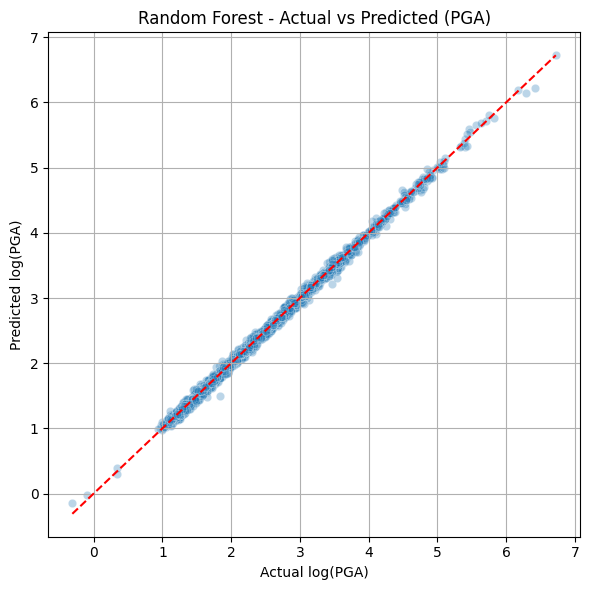

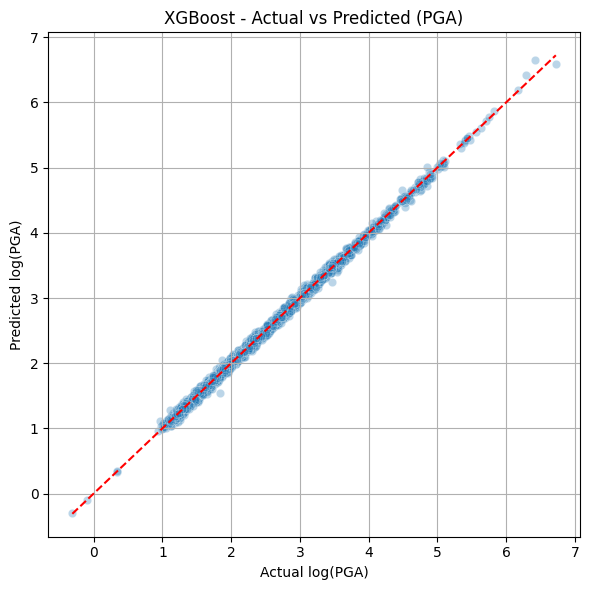

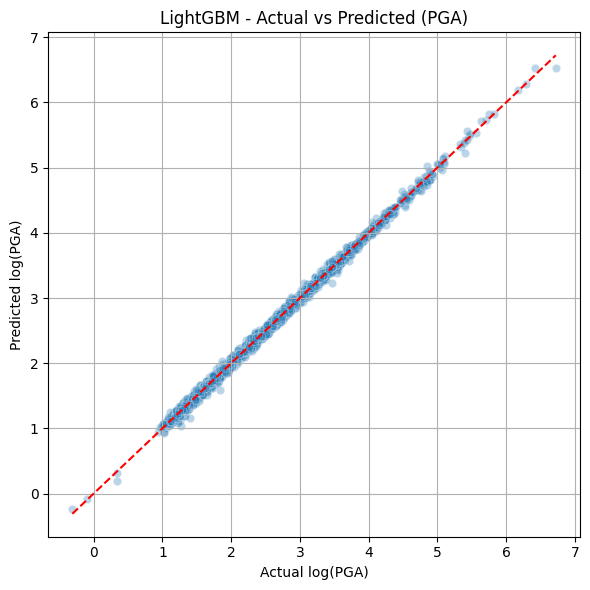

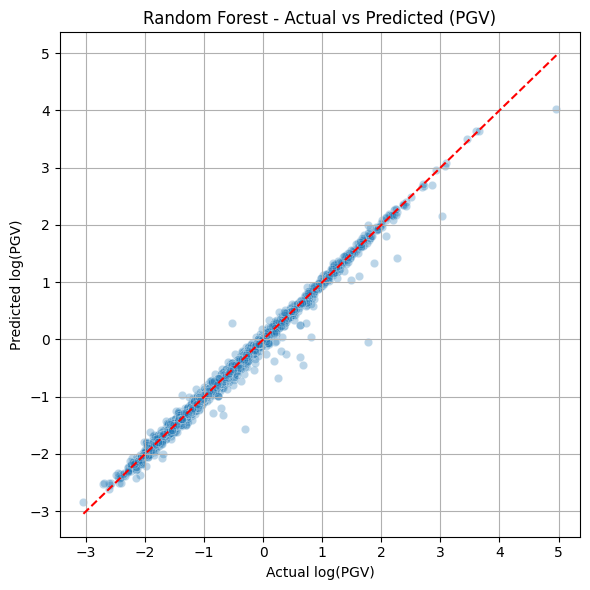

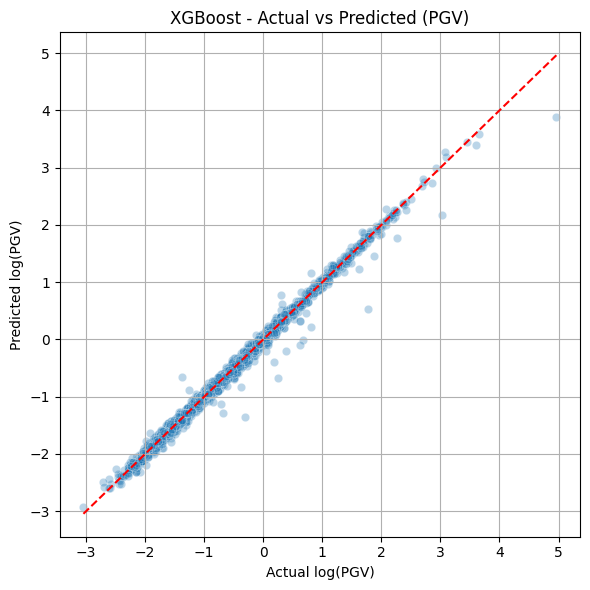

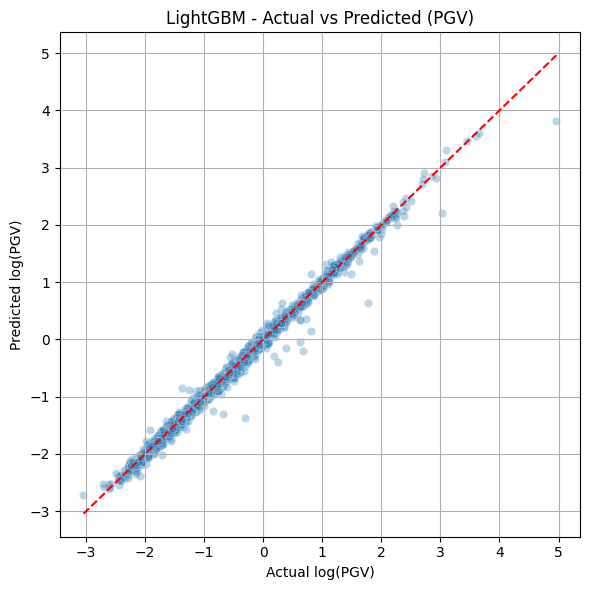

In [125]:
def plot_actual_vs_predicted(y_true, y_pred, model_name, target_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.xlabel(f"Actual log({target_name})")
    plt.ylabel(f"Predicted log({target_name})")
    plt.title(f"{model_name} - Actual vs Predicted ({target_name})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# PGA
plot_actual_vs_predicted(y_test_pga, rf_pred_pga, "Random Forest", "PGA")
plot_actual_vs_predicted(y_test_pga, xgb_pred_pga, "XGBoost", "PGA")
plot_actual_vs_predicted(y_test_pga, lgbm_pred_pga, "LightGBM", "PGA")

# PGV
plot_actual_vs_predicted(y_test_pgv, rf_pred_pgv, "Random Forest", "PGV")
plot_actual_vs_predicted(y_test_pgv, xgb_pred_pgv, "XGBoost", "PGV")
plot_actual_vs_predicted(y_test_pgv, lgbm_pred_pgv, "LightGBM", "PGV")

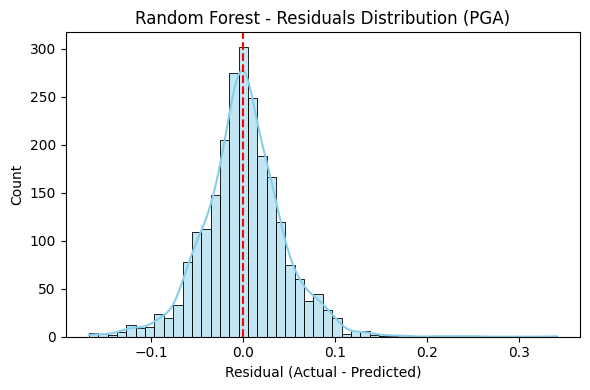

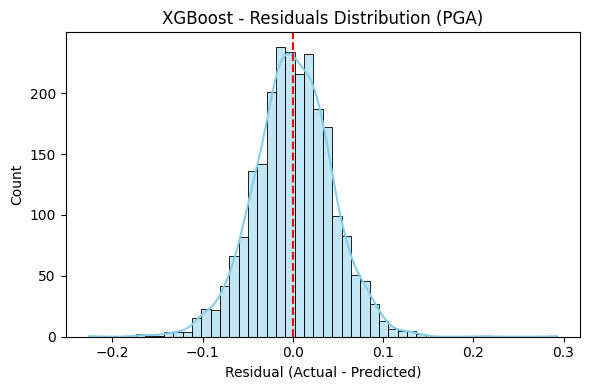

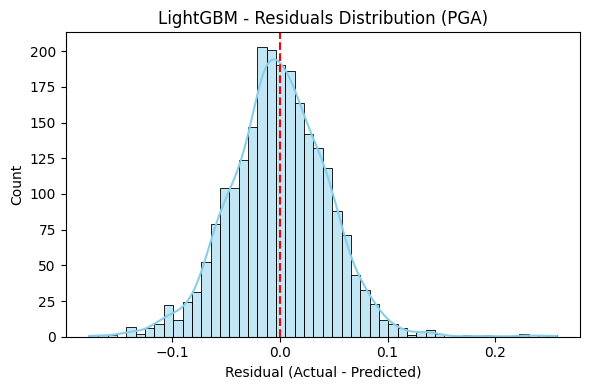

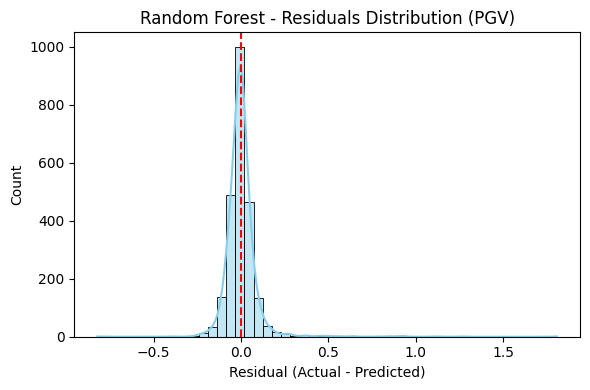

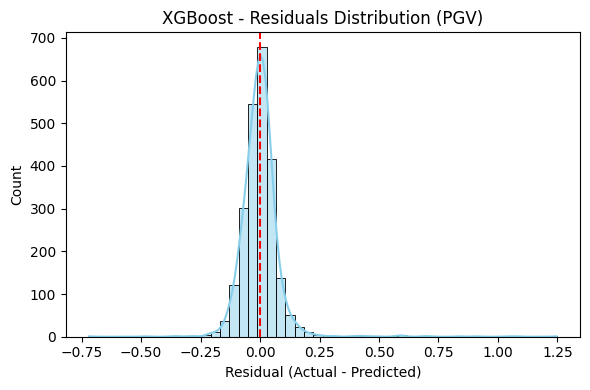

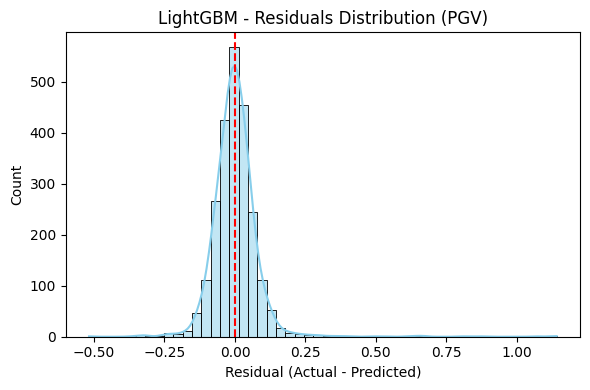

In [126]:
def plot_residuals(y_true, y_pred, model_name, target_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=50, color='skyblue')
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"{model_name} - Residuals Distribution ({target_name})")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.tight_layout()
    plt.show()

# PGA
plot_residuals(y_test_pga, rf_pred_pga, "Random Forest", "PGA")
plot_residuals(y_test_pga, xgb_pred_pga, "XGBoost", "PGA")
plot_residuals(y_test_pga, lgbm_pred_pga, "LightGBM", "PGA")

# PGV
plot_residuals(y_test_pgv, rf_pred_pgv, "Random Forest", "PGV")
plot_residuals(y_test_pgv, xgb_pred_pgv, "XGBoost", "PGV")
plot_residuals(y_test_pgv, lgbm_pred_pgv, "LightGBM", "PGV")


#Implement Bayesian models

Bayesian Linear Regression

In [111]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_selected)

In [112]:
# Select features (use same 150 selected features)
X_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pga, test_size=0.2, random_state=42)

with pm.Model() as model_pga:
    # Priors for coefficients and intercept
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=1, shape=X_train.shape[1])
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + pm.math.dot(X_train, beta)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_train)

    # Sampling
    trace_pga = pm.sample(300, tune=1000, target_accept=0.9, return_inferencedata=True, progressbar=True)

    # Posterior Predictive
    posterior_predictive = pm.sample_posterior_predictive(trace_pga, var_names=["alpha", "beta"], random_seed=42)


Output()

ERROR:pymc.stats.convergence:There were 475 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

In [113]:
# Get mean beta and alpha from trace
alpha_post = trace_pga.posterior['alpha'].mean().values
beta_post = trace_pga.posterior['beta'].mean(dim=["chain", "draw"]).values

# Predict
y_pred_pga_bayes = X_test @ beta_post + alpha_post

# Evaluate
evaluate_model(y_test, y_pred_pga_bayes, "Bayesian Linear Regression (PGA)")




📊 Bayesian Linear Regression (PGA) Evaluation:
MAE  = 4.5571
RMSE = 8.8484
R²   = -88.7103


/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


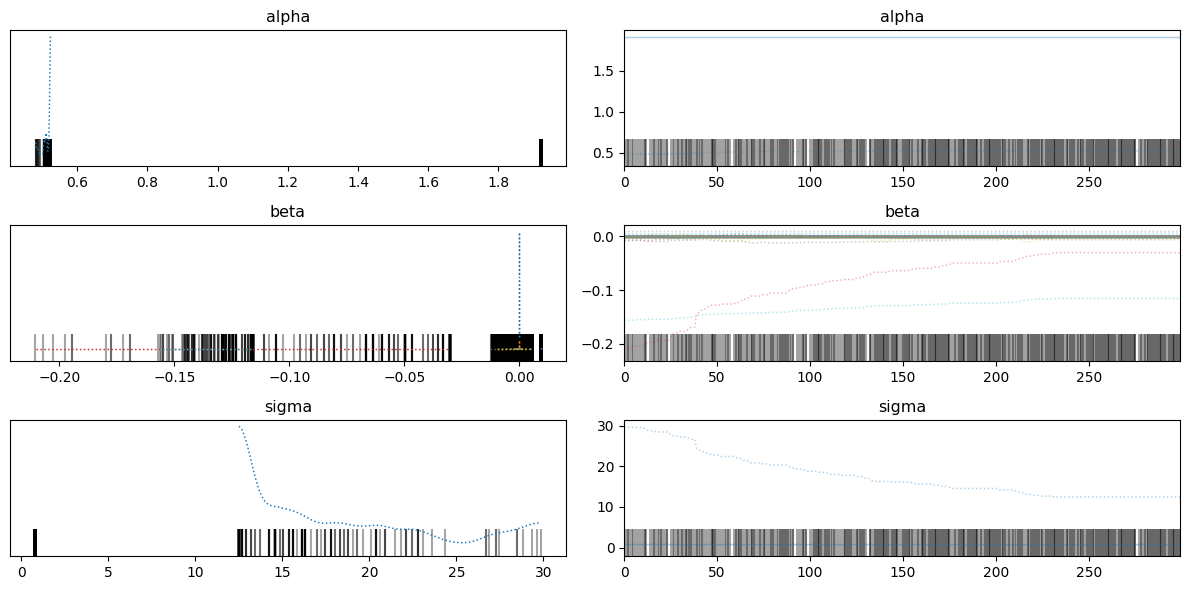

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.217,0.703,0.492,1.920,0.491,0.005,2.0,11.0,3.61
beta[0],-0.000,0.000,-0.000,0.000,0.000,0.000,2.0,23.0,3.72
beta[1],-0.000,0.000,-0.000,-0.000,0.000,0.000,3.0,22.0,2.32
beta[2],0.000,0.000,0.000,0.000,0.000,0.000,2.0,2.0,3.16
beta[3],-0.000,0.000,-0.001,-0.000,0.000,0.000,2.0,11.0,3.75
beta[4],0.001,0.001,0.000,0.002,0.000,0.000,2.0,2.0,2.90
beta[5],-0.004,0.004,-0.011,-0.001,0.003,0.001,2.0,22.0,3.01
beta[6],0.000,0.000,-0.000,0.000,0.000,0.000,3.0,40.0,2.29
beta[7],-0.001,0.001,-0.002,0.000,0.000,0.000,4.0,5.0,2.85
beta[8],0.000,0.000,-0.001,0.001,0.000,0.000,45.0,32.0,2.25


In [114]:
az.plot_trace(trace_pga)
plt.tight_layout()
plt.show()

az.summary(trace_pga)


In [115]:
# Scaling and splitting
X_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pgv, test_size=0.2, random_state=42)


In [116]:
with pm.Model() as model_pgv:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=1, shape=X_train.shape[1])
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected mean
    mu = alpha + pm.math.dot(X_train, beta)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_train)

    # Sampling
    trace_pgv = pm.sample(300, tune=1000, target_accept=0.9, return_inferencedata=True, progressbar=True)

    # Posterior predictive samples
    posterior_predictive = pm.sample_posterior_predictive(trace_pgv, var_names=["alpha", "beta"], random_seed=42)


Output()

ERROR:pymc.stats.convergence:There were 271 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

In [117]:
# Extract mean values
alpha_post = trace_pgv.posterior['alpha'].mean().values
beta_post = trace_pgv.posterior['beta'].mean(dim=["chain", "draw"]).values

# Predict on test set
y_pred_pgv_bayes = X_test @ beta_post + alpha_post

# Evaluate
evaluate_model(y_test, y_pred_pgv_bayes, "Bayesian Linear Regression (PGV)")
# plot_prediction_vs_actual(y_test, y_pred_pgv_bayes, 'PGV_log', 'Bayesian Linear Regression')



📊 Bayesian Linear Regression (PGV) Evaluation:
MAE  = 0.4532
RMSE = 0.7285
R²   = 0.4855


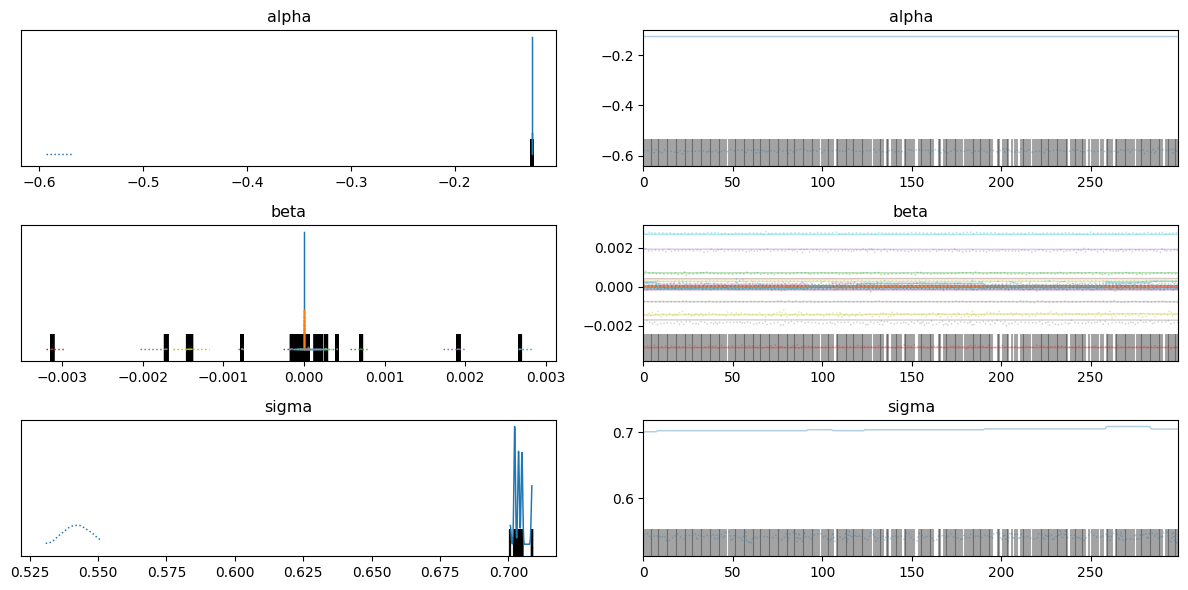

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.353,0.228,-0.586,-0.126,0.159,0.000,3.0,40.0,1.98
beta[0],0.000,0.000,0.000,0.000,0.000,0.000,21.0,190.0,1.09
beta[1],0.000,0.000,-0.000,0.000,0.000,0.000,3.0,18.0,2.20
beta[2],0.000,0.000,0.000,0.000,0.000,0.000,3.0,305.0,2.16
beta[3],0.000,0.000,0.000,0.000,0.000,0.000,4.0,265.0,1.55
beta[4],-0.000,0.000,-0.000,0.000,0.000,0.000,3.0,7.0,2.23
beta[5],0.000,0.000,0.000,0.000,0.000,0.000,3.0,487.0,2.24
beta[6],-0.000,0.000,-0.000,-0.000,0.000,0.000,31.0,254.0,1.61
beta[7],-0.001,0.000,-0.001,-0.001,0.000,0.000,79.0,151.0,1.82
beta[8],0.000,0.000,0.000,0.000,0.000,0.000,6.0,187.0,1.76


In [118]:
az.plot_trace(trace_pgv)
plt.tight_layout()
plt.show()

az.summary(trace_pgv)


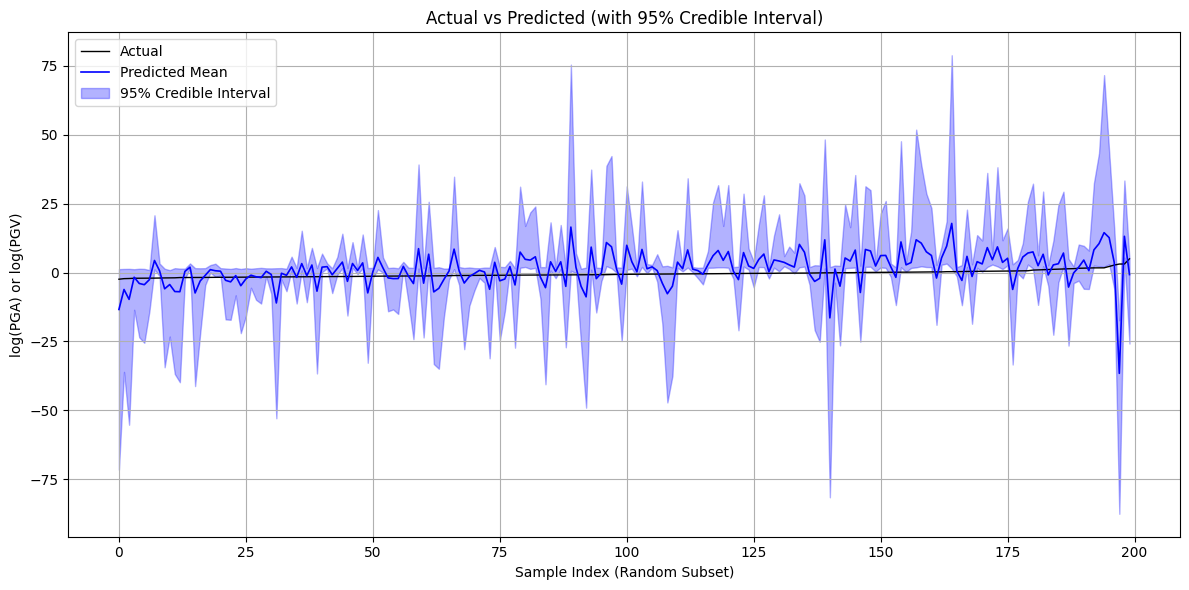

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Sample a subset (e.g., 200 random indices)
n_plot = 200
rng = np.random.default_rng(42)
sample_idx = rng.choice(len(y_test), size=n_plot, replace=False)

# Sort the sample for better visualization
sorted_idx = np.argsort(y_test.iloc[sample_idx].values)

# Get sorted data
y_sorted = y_test.iloc[sample_idx].values[sorted_idx]
pred_sorted = pred_mean[sample_idx][sorted_idx]
lower_sorted = pred_lower[sample_idx][sorted_idx]
upper_sorted = pred_upper[sample_idx][sorted_idx]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_sorted, label="Actual", color="black", linewidth=1)
plt.plot(pred_sorted, label="Predicted Mean", color="blue", linewidth=1.2)
plt.fill_between(np.arange(n_plot),
                 lower_sorted, upper_sorted,
                 color="blue", alpha=0.3, label="95% Credible Interval")

plt.title("Actual vs Predicted (with 95% Credible Interval)")
plt.xlabel("Sample Index (Random Subset)")
plt.ylabel("log(PGA) or log(PGV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
